In [100]:
import sys
import os

import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import json
from jupyterthemes import jtplot
from tqdm.auto import tqdm
jtplot.style()
%matplotlib inline

In [19]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        obj = data[data.find('{') : data.rfind('}')+1]
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
#             waveform_data = pd.DataFrame(jsonObj['data'], columns=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])    
            waveform_data = pl.DataFrame(jsonObj['data'], schema=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])
            return waveform_data
    return []

In [40]:
filepaths = []

filepaths.append("data/negative/1361888.js") #negative
filepaths.append("data/negative/3240209.js") #negative
filepaths.append("data/positive/1054130.js") #positive

In [43]:
waveform = load_waveform(filepaths[0])

In [22]:
waveform.head()

shape: (5, 6)
┌────────────────┬──────────┬─────────────┬──────────────┬───────────┬─────────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ rise_time ┆ pulse_width │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆ ---       ┆ ---         │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆ i64       ┆ i64         │
╞════════════════╪══════════╪═════════════╪══════════════╪═══════════╪═════════════╡
│ 23.5           ┆ 18998    ┆ 130         ┆ 25705        ┆ 0         ┆ 0           │
│ 22.25          ┆ 56717    ┆ 132         ┆ 25705        ┆ 0         ┆ 0           │
│ 23.0           ┆ 3915     ┆ 132         ┆ 25705        ┆ 347       ┆ 0           │
│ 24.25          ┆ 19811    ┆ 133         ┆ 25705        ┆ 0         ┆ 0           │
│ 25.25          ┆ 8514     ┆ 134         ┆ 25705        ┆ 0         ┆ 0           │
└────────────────┴──────────┴─────────────┴──────────────┴───────────┴─────────────┘

In [31]:
waveform.describe()

shape: (7, 7)
┌────────────┬────────────────┬─────────────┬─────────────┬──────────────┬───────────┬─────────────┐
│ describe   ┆ peak_amplitude ┆ integral    ┆ phase_angle ┆ cycle_number ┆ rise_time ┆ pulse_width │
│ ---        ┆ ---            ┆ ---         ┆ ---         ┆ ---          ┆ ---       ┆ ---         │
│ str        ┆ f64            ┆ f64         ┆ f64         ┆ f64          ┆ f64       ┆ f64         │
╞════════════╪════════════════╪═════════════╪═════════════╪══════════════╪═══════════╪═════════════╡
│ count      ┆ 12215.0        ┆ 12215.0     ┆ 12215.0     ┆ 12215.0      ┆ 12215.0   ┆ 12215.0     │
│ null_count ┆ 0.0            ┆ 0.0         ┆ 0.0         ┆ 0.0          ┆ 0.0       ┆ 0.0         │
│ mean       ┆ 8.389153       ┆ 3077.722472 ┆ 189.368645  ┆ 1662.002374  ┆ 3.009251  ┆ 7.624314    │
│ std        ┆ 2.121893       ┆ 2384.198743 ┆ 84.978648   ┆ 144.148022   ┆ 21.529813 ┆ 32.956232   │
│ min        ┆ 3.75           ┆ -22461.0    ┆ 0.0         ┆ 1412.0       ┆ 0.0       ┆ 0.0         │
│ max        ┆ 24.0           ┆ 29589.0     ┆ 359.0       ┆ 1912.0       ┆ 490.0     ┆ 489.0       │
│ median     ┆ 8.0            ┆ 3085.0      ┆ 187.0       ┆ 1660.0       ┆ 0.0       ┆ 3.0         │
└────────────┴────────────────┴─────────────┴─────────────┴──────────────┴───────────┴─────────────┘

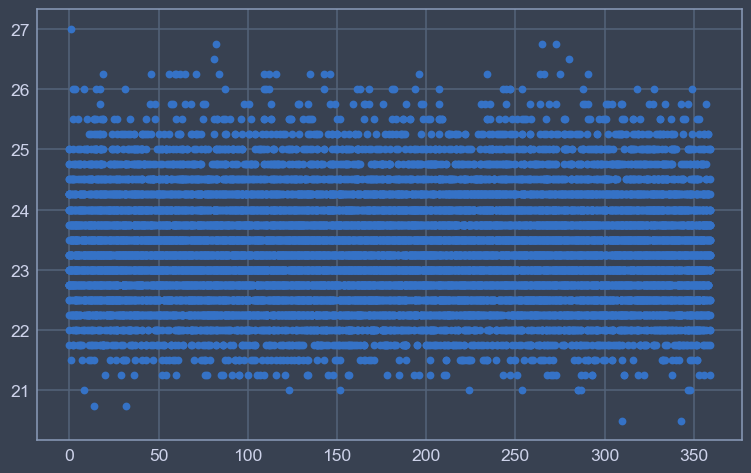

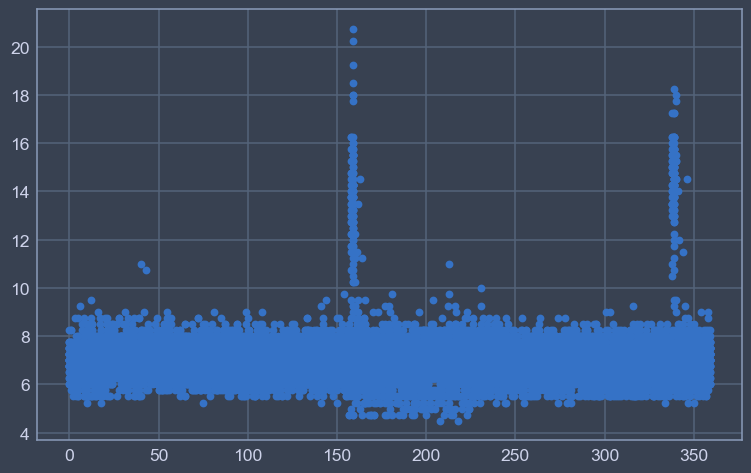

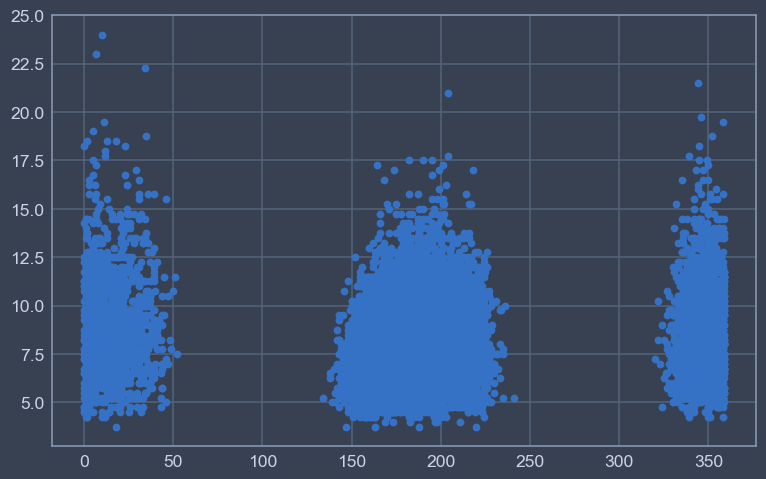

In [30]:
for filepath in filepaths:
  waveform = load_waveform(filepath)

  fig = plt.figure()
  fig.set_figwidth(20)     

  plt_1 = plt.subplot(1, 2, 1)    
  plt.plot(waveform["phase_angle"], waveform["peak_amplitude"], 'o')

# Data Loading & EDA

In [48]:
# saving to csv files
for root, dirs, files in os.walk("./data"):
    path = root.split(os.sep)
    print((len(path) - 1) * "---", os.path.basename(root))
    for file in files:
        print(len(path) * "---", file)
        with open(os.path.join(root, file)) as dataFile:
            data = dataFile.read()
            obj = data[data.find('{') : data.rfind('}')+1]
            jsonObj = json.loads(obj)
        df = pl.DataFrame(jsonObj['data'], schema=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"])
        df.write_csv(os.path.join("./polars", os.path.basename(root), os.path.splitext(file)[0] + ".csv"))

 data
--- negative
------ 1011083.js
------ 1015896.js
------ 1029777.js
------ 1047582.js
------ 1056759.js
------ 1089139.js
------ 1152310.js
------ 1194291.js
------ 1220019.js
------ 1221514.js
------ 1244284.js
------ 1271333.js
------ 1303122.js
------ 1330029.js
------ 1361888.js
------ 1383620.js
------ 1398877.js
------ 1446539.js
------ 1463420.js
------ 1486626.js
------ 1533959.js
------ 1548970.js
------ 1575769.js
------ 1598234.js
------ 1605021.js
------ 1611175.js
------ 1614575.js
------ 1616779.js
------ 1670694.js
------ 1702322.js
------ 1783950.js
------ 1814570.js
------ 1869953.js
------ 1908368.js
------ 1934612.js
------ 1956316.js
------ 1986007.js
------ 2058789.js
------ 2092863.js
------ 2107672.js
------ 2206814.js
------ 2207573.js
------ 2311915.js
------ 2322660.js
------ 2358253.js
------ 2495477.js
------ 2523894.js
------ 2529744.js
------ 2544734.js
------ 2590843.js
------ 2710846.js
------ 2788964.js
------ 2805239.js
------ 2810569.js
------ 28

In [2]:
# load all into one big df
df = None
for root, dirs, files in os.walk("./polars"):
    path = root.split(os.sep)
    print((len(path) - 1) * "---", os.path.basename(root))
    for file in files:
        print(len(path) * "---", file)
        data = pl.read_csv(
            os.path.join("./polars", os.path.basename(root), file),
            new_columns=["peak_amplitude", "integral", "phase_angle", "cycle_number", "rise_time", "pulse_width"]
        )
        data = data.with_columns(pl.lit(path[1]).alias("label"))
        data = data.with_columns(pl.lit(os.path.splitext(file)[0]).alias("file"))
        data = data.filter(pl.col("peak_amplitude") > 0)
        data = data.with_columns(
            data["peak_amplitude"].apply(lambda x: 10 * np.log10(x)).alias("peak_amp_db")
        )
        data = data.unique()
        if df is not None:
            df = df.vstack(data)
        else:
            df = data

 polars
--- negative
------ 1011083.csv
------ 1015896.csv
------ 1029777.csv
------ 1047582.csv
------ 1056759.csv
------ 1089139.csv
------ 1152310.csv
------ 1194291.csv
------ 1220019.csv
------ 1221514.csv
------ 1244284.csv
------ 1271333.csv
------ 1303122.csv
------ 1330029.csv
------ 1361888.csv
------ 1383620.csv
------ 1398877.csv
------ 1446539.csv
------ 1463420.csv
------ 1486626.csv
------ 1533959.csv
------ 1548970.csv
------ 1575769.csv
------ 1598234.csv
------ 1605021.csv
------ 1611175.csv
------ 1614575.csv
------ 1616779.csv
------ 1670694.csv
------ 1702322.csv
------ 1783950.csv
------ 1814570.csv
------ 1869953.csv
------ 1908368.csv
------ 1934612.csv
------ 1956316.csv
------ 1986007.csv
------ 2058789.csv
------ 2092863.csv
------ 2107672.csv
------ 2206814.csv
------ 2207573.csv
------ 2311915.csv
------ 2322660.csv
------ 2358253.csv
------ 2495477.csv
------ 2523894.csv
------ 2529744.csv
------ 2544734.csv
------ 2590843.csv
------ 2710846.csv
------ 278

In [8]:
len(df.filter(pl.col("label") == "positive")) / len(df.filter(pl.col("label") != "unclassified")),\
len(df.filter(pl.col("label") == "negative")) / len(df.filter(pl.col("label") != "unclassified"))

(0.172479372623668, 0.827520627376332)

In [4]:
df.head()

shape: (5, 8)
┌────────────────┬──────────┬─────────────┬──────────────┬───────────┬─────────────┬──────────┬─────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ rise_time ┆ pulse_width ┆ label    ┆ file    │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆ ---       ┆ ---         ┆ ---      ┆ ---     │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆ i64       ┆ i64         ┆ str      ┆ str     │
╞════════════════╪══════════╪═════════════╪══════════════╪═══════════╪═════════════╪══════════╪═════════╡
│ 23.5           ┆ 18998    ┆ 130         ┆ 25705        ┆ 0         ┆ 0           ┆ negative ┆ 1011083 │
│ 22.25          ┆ 56717    ┆ 132         ┆ 25705        ┆ 0         ┆ 0           ┆ negative ┆ 1011083 │
│ 23.0           ┆ 3915     ┆ 132         ┆ 25705        ┆ 347       ┆ 0           ┆ negative ┆ 1011083 │
│ 24.25          ┆ 19811    ┆ 133         ┆ 25705        ┆ 0         ┆ 0           ┆ negative ┆ 1011083 │
│ 25.25          ┆ 8514     ┆ 134         ┆ 25705        ┆ 0         ┆ 0           ┆ negative ┆ 1011083 │
└────────────────┴──────────┴─────────────┴──────────────┴───────────┴─────────────┴──────────┴─────────┘

In [48]:
df["peak_amplitude"].unique().sort()

shape: (156,)
Series: 'peak_amplitude' [f64]
[
	0.25
	0.5
	0.75
	1.0
	1.25
	1.5
	1.75
	2.0
	2.25
	2.5
	2.75
	3.0
	...
	36.0
	36.25
	36.5
	36.75
	37.0
	37.25
	37.5
	37.75
	38.0
	38.25
	38.5
	38.75
	42.75
]

In [116]:
df.describe()

shape: (7, 10)
┌────────────┬────────────────┬──────────────┬─────────────┬─────┬─────────────┬──────────────┬─────────┬─────────────┐
│ describe   ┆ peak_amplitude ┆ integral     ┆ phase_angle ┆ ... ┆ pulse_width ┆ label        ┆ file    ┆ peak_amp_db │
│ ---        ┆ ---            ┆ ---          ┆ ---         ┆     ┆ ---         ┆ ---          ┆ ---     ┆ ---         │
│ str        ┆ f64            ┆ f64          ┆ f64         ┆     ┆ f64         ┆ str          ┆ str     ┆ f64         │
╞════════════╪════════════════╪══════════════╪═════════════╪═════╪═════════════╪══════════════╪═════════╪═════════════╡
│ count      ┆ 5.291244e6     ┆ 5.291244e6   ┆ 5.291244e6  ┆ ... ┆ 5.291244e6  ┆ 5291244      ┆ 5291244 ┆ 5.291244e6  │
│ null_count ┆ 0.0            ┆ 0.0          ┆ 0.0         ┆ ... ┆ 0.0         ┆ 0            ┆ 0       ┆ 0.0         │
│ mean       ┆ 8.683517       ┆ 1700.475217  ┆ 179.249455  ┆ ... ┆ 48.512864   ┆ null         ┆ null    ┆ 7.326295    │
│ std        ┆ 7.545439       ┆ 15033.407818 ┆ 103.404845  ┆ ... ┆ 118.269982  ┆ null         ┆ null    ┆ 4.794983    │
│ min        ┆ 0.25           ┆ -187175.0    ┆ 0.0         ┆ ... ┆ 0.0         ┆ negative     ┆ 1001263 ┆ -6.0206     │
│ max        ┆ 42.75          ┆ 148246.0     ┆ 359.0       ┆ ... ┆ 500.0       ┆ unclassified ┆ 6470079 ┆ 16.309361   │
│ median     ┆ 6.5            ┆ 1866.0       ┆ 179.0       ┆ ... ┆ 0.0         ┆ null         ┆ null    ┆ 8.129134    │
└────────────┴────────────────┴──────────────┴─────────────┴─────┴─────────────┴──────────────┴─────────┴─────────────┘

In [59]:
df.filter(pl.col("label") == "negative").describe()

shape: (7, 8)
┌────────────┬────────────────┬──────────────┬─────────────┬──────────────┬───────────┬─────────────┬──────────┐
│ describe   ┆ peak_amplitude ┆ integral     ┆ phase_angle ┆ cycle_number ┆ rise_time ┆ pulse_width ┆ label    │
│ ---        ┆ ---            ┆ ---          ┆ ---         ┆ ---          ┆ ---       ┆ ---         ┆ ---      │
│ str        ┆ f64            ┆ f64          ┆ f64         ┆ f64          ┆ f64       ┆ f64         ┆ str      │
╞════════════╪════════════════╪══════════════╪═════════════╪══════════════╪═══════════╪═════════════╪══════════╡
│ count      ┆ 3.41109e6      ┆ 3.41109e6    ┆ 3.41109e6   ┆ 3.41109e6    ┆ 3.41109e6 ┆ 3.41109e6   ┆ 3411090  │
│ null_count ┆ 0.0            ┆ 0.0          ┆ 0.0         ┆ 0.0          ┆ 0.0       ┆ 0.0         ┆ 0        │
│ mean       ┆ 10.846391      ┆ 2681.890623  ┆ 179.89933   ┆ 31117.355334 ┆ 25.352788 ┆ 52.313137   ┆ null     │
│ std        ┆ 8.140612       ┆ 17843.571203 ┆ 103.34788   ┆ 13793.412471 ┆ 85.546381 ┆ 122.723001  ┆ null     │
│ min        ┆ -0.49          ┆ -162252.0    ┆ 0.0         ┆ 0.0          ┆ 0.0       ┆ 0.0         ┆ negative │
│ max        ┆ 42.75          ┆ 132179.0     ┆ 359.0       ┆ 65535.0      ┆ 500.0     ┆ 500.0       ┆ negative │
│ median     ┆ 9.0            ┆ 2464.0       ┆ 180.0       ┆ 29895.0      ┆ 0.0       ┆ 0.0         ┆ null     │
└────────────┴────────────────┴──────────────┴─────────────┴──────────────┴───────────┴─────────────┴──────────┘

In [60]:
df.filter(pl.col("label") == "positive").describe()

shape: (7, 8)
┌────────────┬────────────────┬─────────────┬─────────────┬──────────────┬───────────┬─────────────┬──────────┐
│ describe   ┆ peak_amplitude ┆ integral    ┆ phase_angle ┆ cycle_number ┆ rise_time ┆ pulse_width ┆ label    │
│ ---        ┆ ---            ┆ ---         ┆ ---         ┆ ---          ┆ ---       ┆ ---         ┆ ---      │
│ str        ┆ f64            ┆ f64         ┆ f64         ┆ f64          ┆ f64       ┆ f64         ┆ str      │
╞════════════╪════════════════╪═════════════╪═════════════╪══════════════╪═══════════╪═════════════╪══════════╡
│ count      ┆ 728057.0       ┆ 728057.0    ┆ 728057.0    ┆ 728057.0     ┆ 728057.0  ┆ 728057.0    ┆ 728057   │
│ null_count ┆ 0.0            ┆ 0.0         ┆ 0.0         ┆ 0.0          ┆ 0.0       ┆ 0.0         ┆ 0        │
│ mean       ┆ 5.313485       ┆ 1068.596006 ┆ 175.732072  ┆ 33566.880224 ┆ 12.193621 ┆ 28.735376   ┆ null     │
│ std        ┆ 4.679338       ┆ 6074.773424 ┆ 102.845518  ┆ 15416.233028 ┆ 59.37075  ┆ 89.616072   ┆ null     │
│ min        ┆ -0.49          ┆ -187175.0   ┆ 0.0         ┆ 1412.0       ┆ 0.0       ┆ 0.0         ┆ positive │
│ max        ┆ 38.75          ┆ 148246.0    ┆ 359.0       ┆ 65257.0      ┆ 490.0     ┆ 500.0       ┆ positive │
│ median     ┆ 4.25           ┆ 1559.0      ┆ 176.0       ┆ 34599.0      ┆ 0.0       ┆ 0.0         ┆ null     │
└────────────┴────────────────┴─────────────┴─────────────┴──────────────┴───────────┴─────────────┴──────────┘

<Axes: xlabel='peak_amplitude', ylabel='Density'>

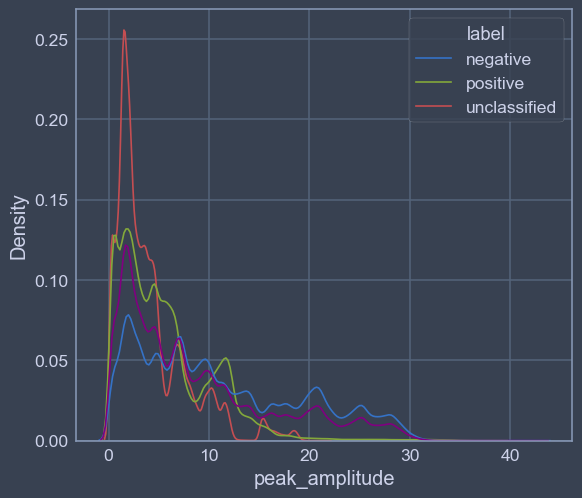

In [27]:
ax = sns.kdeplot(data=df, x="peak_amplitude", hue="label", common_norm=False)
sns.kdeplot(data=df, x="peak_amplitude", common_norm=False, ax=ax, color="purple")

<Axes: xlabel='peak_amp_db', ylabel='Density'>

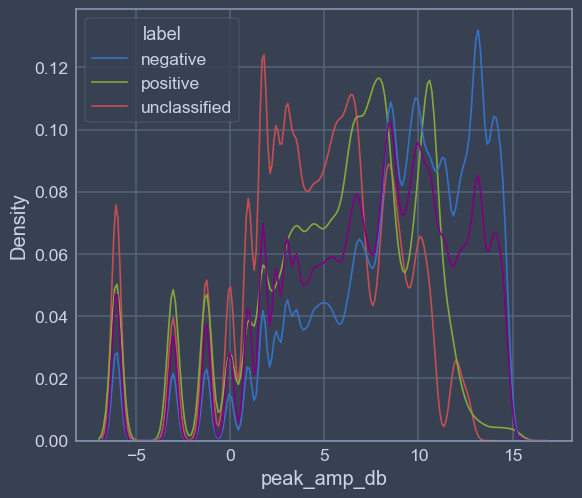

In [117]:
ax = sns.kdeplot(data=df.filter(pl.col("peak_amp_db").is_not_nan()), x="peak_amp_db", hue="label", common_norm=False)
sns.kdeplot(data=df.filter(pl.col("peak_amp_db").is_not_nan()), x="peak_amp_db", common_norm=False, ax=ax, color="purple")

<Axes: xlabel='peak_amp_db', ylabel='Density'>

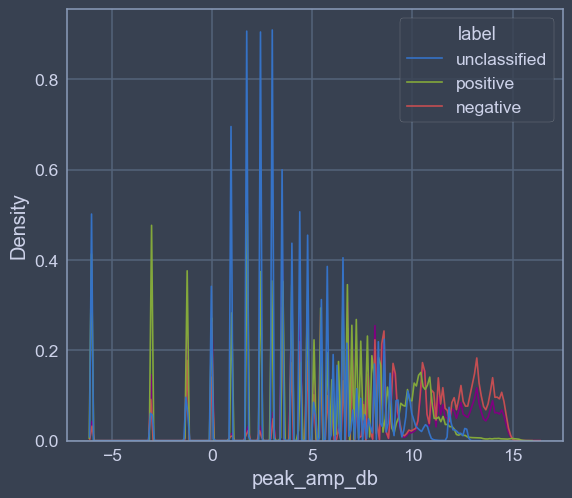

In [118]:
ax = sns.kdeplot(data=df, x="peak_amp_db", color="purple", common_norm=False, bw_adjust=0.1)
sns.kdeplot(data=df, x="peak_amp_db", hue="label", hue_order=["unclassified", "positive", "negative"], common_norm=False, bw_adjust=0.1, ax=ax)

<Axes: xlabel='phase_angle', ylabel='Density'>

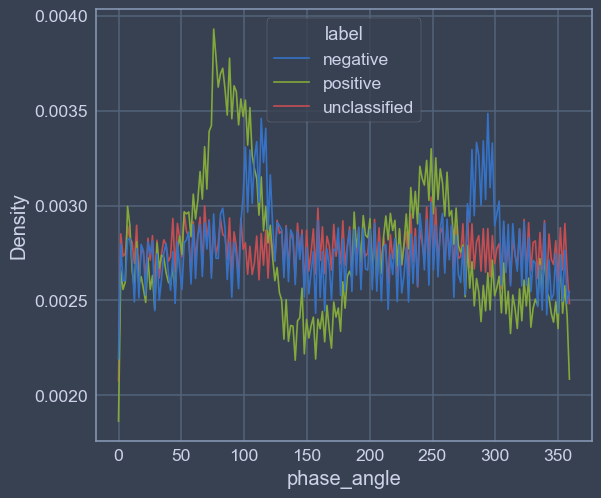

In [15]:
sns.kdeplot(data=df, x="phase_angle", hue="label", common_norm=False, cut=0, bw_adjust=0.1)

In [29]:
len(df)

5291244

In [3]:
df = df.with_columns(pl.col("phase_angle").apply(lambda x: (x * 2 * np.pi) / 360).alias("phase_rad"))

In [22]:
df_equal = pl.concat([df.filter(pl.col("label") == classification).sample(50000, shuffle=True) for classification in ["unclassified", "positive", "negative"]])

In [31]:
df = df.with_columns([
    pl.map(["phase_rad", "peak_amplitude"], lambda v: np.cos(v[0]) * v[1]).alias("polar_x"),
    pl.map(["phase_rad", "peak_amplitude"], lambda v: np.sin(v[0]) * v[1]).alias("polar_y")
])

In [34]:
df.head()

shape: (5, 12)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬─────────────┬───────────┬────────────┬───────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ peak_amp_db ┆ phase_rad ┆ polar_x    ┆ polar_y   │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---         ┆ ---       ┆ ---        ┆ ---       │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ f64         ┆ f64       ┆ f64        ┆ f64       │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═════════════╪═══════════╪════════════╪═══════════╡
│ 23.5           ┆ 18998    ┆ 130         ┆ 25705        ┆ ... ┆ 13.710679   ┆ 2.268928  ┆ -15.105509 ┆ 18.002044 │
│ 22.25          ┆ 56717    ┆ 132         ┆ 25705        ┆ ... ┆ 13.4733     ┆ 2.303835  ┆ -14.888156 ┆ 16.534972 │
│ 23.0           ┆ 3915     ┆ 132         ┆ 25705        ┆ ... ┆ 13.617278   ┆ 2.303835  ┆ -15.390004 ┆ 17.092331 │
│ 24.25          ┆ 19811    ┆ 133         ┆ 25705        ┆ ... ┆ 13.847117   ┆ 2.321288  ┆ -16.53846  ┆ 17.735327 │
│ 25.25          ┆ 8514     ┆ 134         ┆ 25705        ┆ ... ┆ 14.022614   ┆ 2.338741  ┆ -17.540124 ┆ 18.16333  │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴─────────────┴───────────┴────────────┴───────────┘

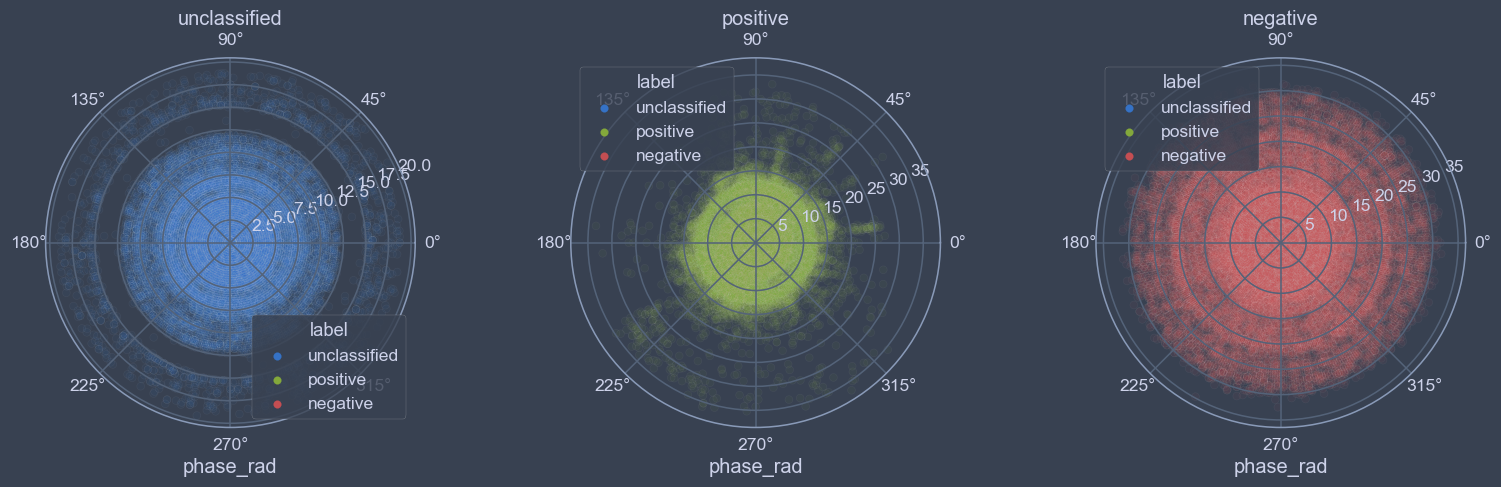

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(19.2, 4.8), subplot_kw=dict(projection="polar"))
for i, classification in enumerate(["unclassified", "positive", "negative"]):
    sns.scatterplot(
        df_equal.filter(pl.col("label") == classification),
        x="phase_rad",
        y="peak_amplitude",
        hue="label",
        hue_order=["unclassified", "positive", "negative"],
        ax=ax[i],
        alpha=0.05
    )
    ax[i].set_title(classification)
    ax[i].set_ylabel("")

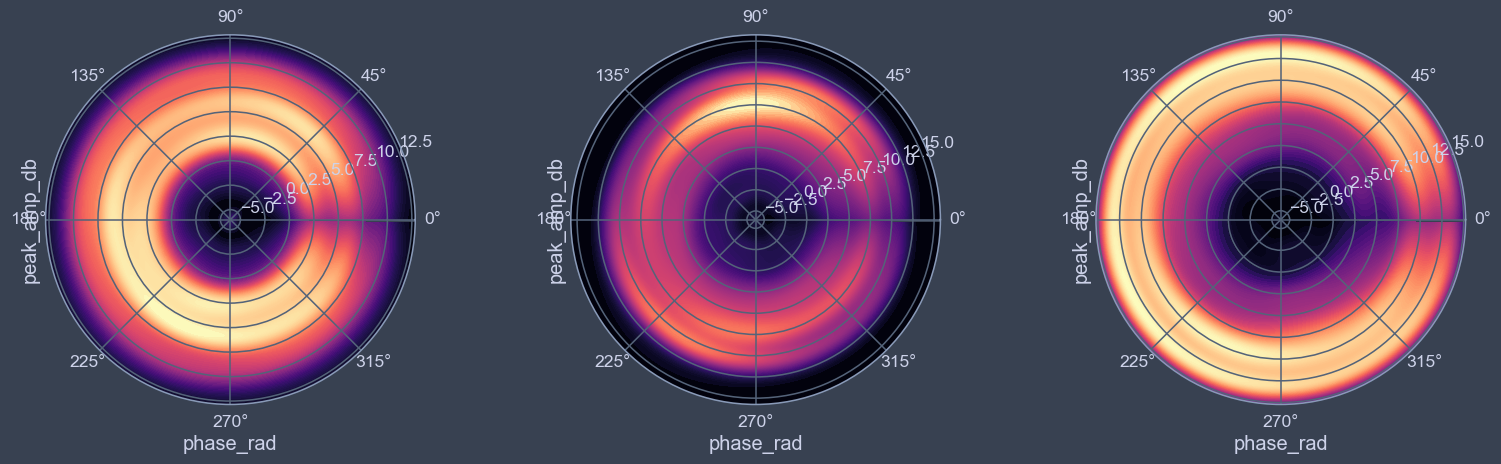

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(19.2, 4.8), subplot_kw=dict(projection='polar'))
for i, classification in enumerate(["unclassified", "positive", "negative"]):
    sns.kdeplot(
        data=df.filter(pl.col("label") == classification).sample(10000, shuffle=True),
        x="phase_rad",
        y="peak_amp_db",
        cut=0,
        levels=100,
        common_norm=False,
        fill=True,
        thresh=0.0,
        cmap="magma",
        ax=ax[i],
    )

<PolarAxes: xlabel='phase_rad', ylabel='Density'>

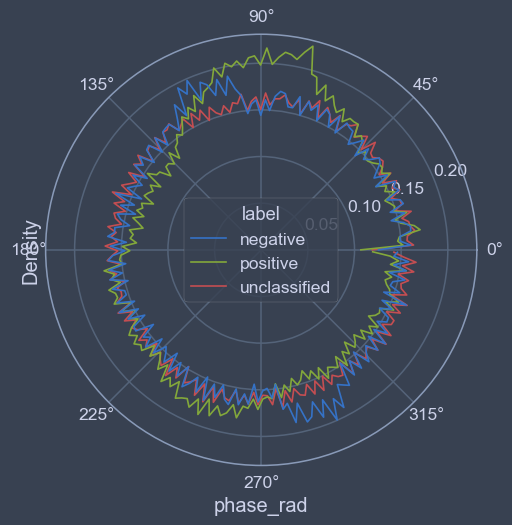

In [17]:
fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
sns.kdeplot(data=df, x="phase_rad", hue="label", common_norm=False, cut=0, bw_adjust=0.1, ax=ax)

In [3]:
df.sample(1000)

shape: (1000, 8)
┌────────────────┬──────────┬─────────────┬──────────────┬───────────┬─────────────┬──────────────┬─────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ rise_time ┆ pulse_width ┆ label        ┆ file    │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆ ---       ┆ ---         ┆ ---          ┆ ---     │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆ i64       ┆ i64         ┆ str          ┆ str     │
╞════════════════╪══════════╪═════════════╪══════════════╪═══════════╪═════════════╪══════════════╪═════════╡
│ 9.75           ┆ 3204     ┆ 57          ┆ 54926        ┆ 0         ┆ 0           ┆ positive     ┆ 5869361 │
│ 4.5            ┆ 9515     ┆ 183         ┆ 46878        ┆ 7         ┆ 10          ┆ negative     ┆ 1956316 │
│ 6.75           ┆ -4883    ┆ 79          ┆ 40553        ┆ 0         ┆ 0           ┆ unclassified ┆ 1025150 │
│ 3.75           ┆ 7033     ┆ 8           ┆ 24994        ┆ 0         ┆ 143         ┆ negative     ┆ 2107672 │
│ ...            ┆ ...      ┆ ...         ┆ ...          ┆ ...       ┆ ...         ┆ ...          ┆ ...     │
│ 13.5           ┆ 5010     ┆ 209         ┆ 6482         ┆ 0         ┆ 0           ┆ negative     ┆ 2590843 │
│ 6.0            ┆ -9507    ┆ 110         ┆ 38130        ┆ 0         ┆ 0           ┆ positive     ┆ 1167250 │
│ 11.0           ┆ 11299    ┆ 77          ┆ 34821        ┆ 0         ┆ 7           ┆ unclassified ┆ 1467964 │
│ 1.5            ┆ 2229     ┆ 143         ┆ 19303        ┆ 0         ┆ 0           ┆ negative     ┆ 5917454 │
└────────────────┴──────────┴─────────────┴──────────────┴───────────┴─────────────┴──────────────┴─────────┘

In [7]:
# df = df.with_columns(df["peak_amplitude"].apply(np.log10).alias("peak_amp_log"))

C:\Users\chris\.virtualenvs\INF2008-XgWG3lwF\lib\site-packages\polars\internals\series\series.py:3836: RuntimeWarning: invalid value encountered in log10
  return wrap_s(self._s.apply_lambda(function, pl_return_dtype, skip_nulls))
C:\Users\chris\.virtualenvs\INF2008-XgWG3lwF\lib\site-packages\polars\internals\series\series.py:3836: RuntimeWarning: divide by zero encountered in log10
  return wrap_s(self._s.apply_lambda(function, pl_return_dtype, skip_nulls))


In [27]:
df.filter(pl.col("peak_amp_log").is_not_nan())

shape: (5391238, 9)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬─────────────┬──────────────┬─────────┬──────────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ pulse_width ┆ label        ┆ file    ┆ peak_amp_log │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---         ┆ ---          ┆ ---     ┆ ---          │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ i64         ┆ str          ┆ str     ┆ f64          │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═════════════╪══════════════╪═════════╪══════════════╡
│ 23.5           ┆ 18998    ┆ 130         ┆ 25705        ┆ ... ┆ 0           ┆ negative     ┆ 1011083 ┆ 1.371068     │
│ 22.25          ┆ 56717    ┆ 132         ┆ 25705        ┆ ... ┆ 0           ┆ negative     ┆ 1011083 ┆ 1.34733      │
│ 23.0           ┆ 3915     ┆ 132         ┆ 25705        ┆ ... ┆ 0           ┆ negative     ┆ 1011083 ┆ 1.361728     │
│ 24.25          ┆ 19811    ┆ 133         ┆ 25705        ┆ ... ┆ 0           ┆ negative     ┆ 1011083 ┆ 1.384712     │
│ ...            ┆ ...      ┆ ...         ┆ ...          ┆ ... ┆ ...         ┆ ...          ┆ ...     ┆ ...          │
│ 2.75           ┆ -2952    ┆ 248         ┆ 11419        ┆ ... ┆ 0           ┆ unclassified ┆ 1556216 ┆ 0.439333     │
│ 1.25           ┆ 884      ┆ 251         ┆ 11419        ┆ ... ┆ 0           ┆ unclassified ┆ 1556216 ┆ 0.09691      │
│ 1.25           ┆ -4721    ┆ 252         ┆ 11419        ┆ ... ┆ 0           ┆ unclassified ┆ 1556216 ┆ 0.09691      │
│ 1.5            ┆ 2285     ┆ 253         ┆ 11419        ┆ ... ┆ 288         ┆ unclassified ┆ 1556216 ┆ 0.176091     │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴─────────────┴──────────────┴─────────┴──────────────┘

<Axes: xlabel='phase_angle', ylabel='peak_amp_db'>

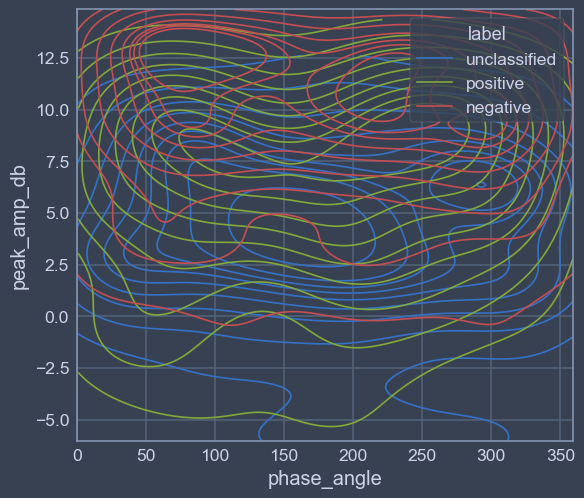

In [3]:
sns.kdeplot(
    data=df.sample(2000, shuffle=True),
    x="phase_angle",
    y="peak_amp_db",
    hue="label",
    hue_order=["unclassified", "positive", "negative"],
    cut=0,
    common_norm=False,
    multiple="layer"
#     log_scale=(False, 10)
)

In [29]:
df.filter(pl.col('file') ==  df.filter(pl.col("label") == "unclassified")["file"].unique()[0]).describe()

shape: (7, 10)
┌────────────┬────────────────┬─────────────┬─────────────┬─────┬─────────────┬──────────────┬─────────┬─────────────┐
│ describe   ┆ peak_amplitude ┆ integral    ┆ phase_angle ┆ ... ┆ pulse_width ┆ label        ┆ file    ┆ peak_amp_db │
│ ---        ┆ ---            ┆ ---         ┆ ---         ┆     ┆ ---         ┆ ---          ┆ ---     ┆ ---         │
│ str        ┆ f64            ┆ f64         ┆ f64         ┆     ┆ f64         ┆ str          ┆ str     ┆ f64         │
╞════════════╪════════════════╪═════════════╪═════════════╪═════╪═════════════╪══════════════╪═════════╪═════════════╡
│ count      ┆ 18047.0        ┆ 18047.0     ┆ 18047.0     ┆ ... ┆ 18047.0     ┆ 18047        ┆ 18047   ┆ 18047.0     │
│ null_count ┆ 0.0            ┆ 0.0         ┆ 0.0         ┆ ... ┆ 0.0         ┆ 0            ┆ 0       ┆ 0.0         │
│ mean       ┆ 1.052114       ┆ 1085.806284 ┆ 179.971519  ┆ ... ┆ 2.190226    ┆ null         ┆ null    ┆ -0.586412   │
│ std        ┆ 0.584049       ┆ 1611.922789 ┆ 98.1497     ┆ ... ┆ 14.765938   ┆ null         ┆ null    ┆ 2.841249    │
│ min        ┆ 0.25           ┆ -9634.0     ┆ 0.0         ┆ ... ┆ 0.0         ┆ unclassified ┆ 1204641 ┆ -6.0206     │
│ max        ┆ 4.75           ┆ 7278.0      ┆ 359.0       ┆ ... ┆ 485.0       ┆ unclassified ┆ 1204641 ┆ 6.766936    │
│ median     ┆ 1.0            ┆ 1191.0      ┆ 183.0       ┆ ... ┆ 0.0         ┆ null         ┆ null    ┆ 0.0         │
└────────────┴────────────────┴─────────────┴─────────────┴─────┴─────────────┴──────────────┴─────────┴─────────────┘

In [39]:
df.filter(df.is_duplicated())

shape: (112, 9)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬─────────────┬──────────────┬─────────┬─────────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ pulse_width ┆ label        ┆ file    ┆ peak_amp_db │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---         ┆ ---          ┆ ---     ┆ ---         │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ i64         ┆ str          ┆ str     ┆ f64         │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═════════════╪══════════════╪═════════╪═════════════╡
│ 4.75           ┆ 6360     ┆ 37          ┆ 46336        ┆ ... ┆ 0           ┆ negative     ┆ 1221514 ┆ 6.766936    │
│ 4.75           ┆ 6360     ┆ 37          ┆ 46336        ┆ ... ┆ 0           ┆ negative     ┆ 1221514 ┆ 6.766936    │
│ 3.75           ┆ 914      ┆ 192         ┆ 34047        ┆ ... ┆ 0           ┆ negative     ┆ 1271333 ┆ 5.740313    │
│ 3.75           ┆ 914      ┆ 192         ┆ 34047        ┆ ... ┆ 0           ┆ negative     ┆ 1271333 ┆ 5.740313    │
│ ...            ┆ ...      ┆ ...         ┆ ...          ┆ ... ┆ ...         ┆ ...          ┆ ...     ┆ ...         │
│ 4.5            ┆ 2105     ┆ 335         ┆ 11227        ┆ ... ┆ 0           ┆ unclassified ┆ 1416037 ┆ 6.532125    │
│ 4.5            ┆ 2105     ┆ 335         ┆ 11227        ┆ ... ┆ 0           ┆ unclassified ┆ 1416037 ┆ 6.532125    │
│ 4.5            ┆ 2298     ┆ 252         ┆ 11252        ┆ ... ┆ 0           ┆ unclassified ┆ 1416037 ┆ 6.532125    │
│ 4.5            ┆ 2298     ┆ 252         ┆ 11252        ┆ ... ┆ 0           ┆ unclassified ┆ 1416037 ┆ 6.532125    │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴─────────────┴──────────────┴─────────┴─────────────┘

In [3]:
df_pd = df.to_pandas()

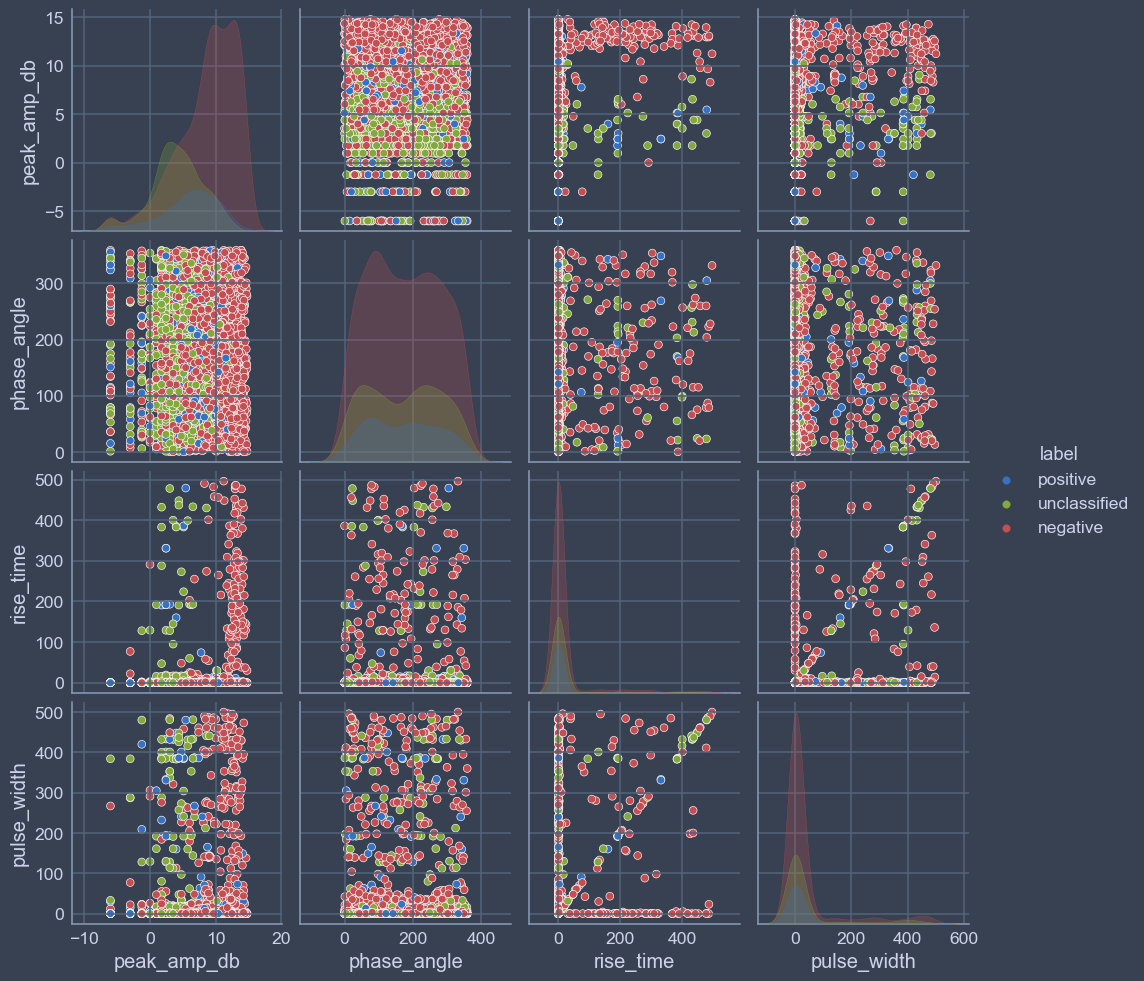

In [5]:
sns.pairplot(
    data=df_pd.sample(2000, random_state=42),
    vars=["peak_amp_db", "phase_angle", "rise_time", "pulse_width"],
    hue="label"
)

In [46]:
len(df) // 100

52912

<Axes: xlabel='phase_angle', ylabel='peak_amp_db'>

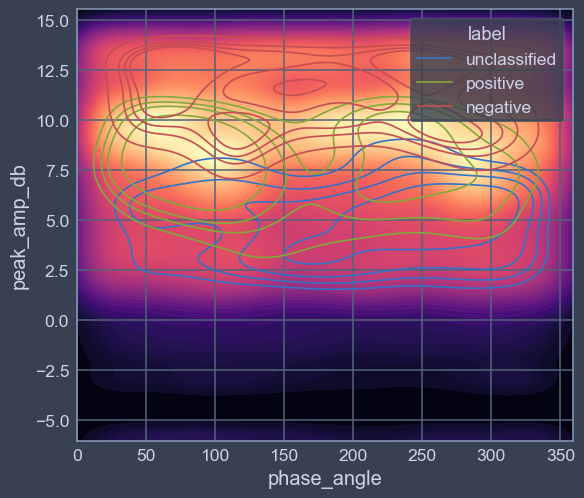

In [47]:
ax = sns.kdeplot(
    data=df.sample(50000, shuffle=True),
    x="phase_angle",
    y="peak_amp_db",
#     hue="label",
#     hue_order=["unclassified", "positive", "negative"],
    cut=0,
    levels=100,
    common_norm=False,
    fill=True,
    thresh=0.0,
    cmap="magma",
#     multiple="layer",
#     log_scale=(False, 10),
#     ax=axs[i]
)
sns.kdeplot(
    data=df.sample(50000, shuffle=True),
    x="phase_angle",
    y="peak_amp_db",
    hue="label",
    hue_order=["unclassified", "positive", "negative"],
    cut=0,
    levels=5,
    common_norm=False,
    thresh=0.5,
    multiple="layer",
)

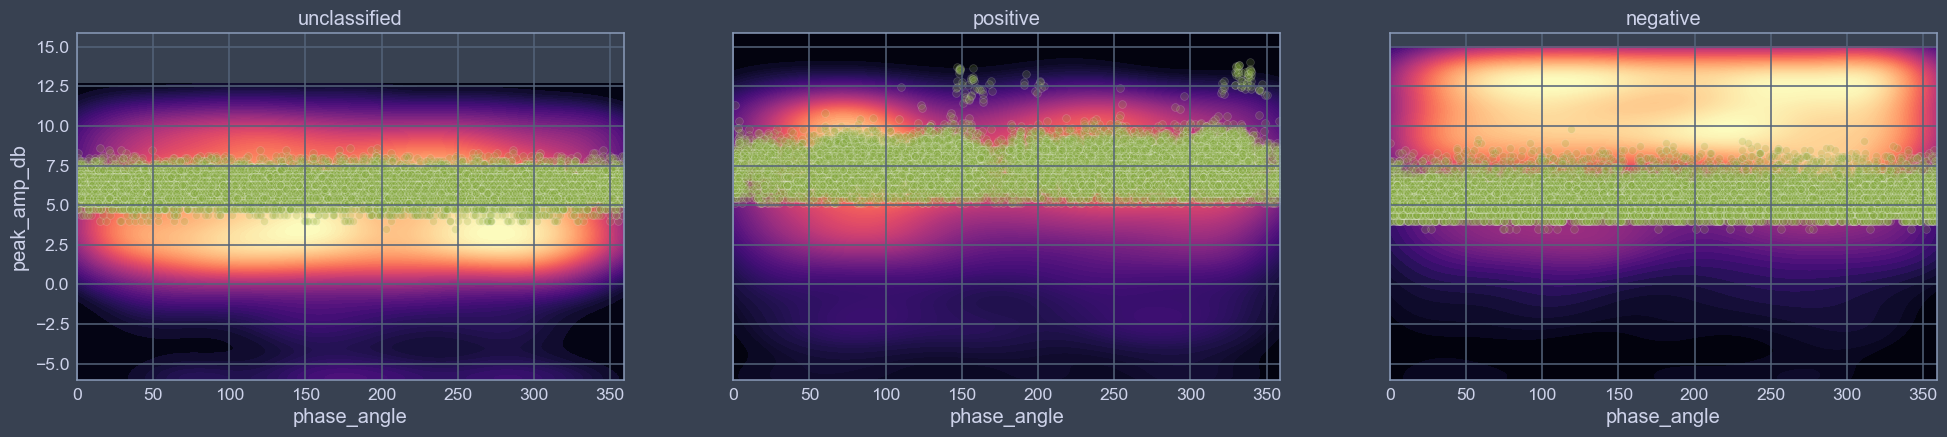

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(24, 4.5), sharey=True)
for i, classification in enumerate(["unclassified", "positive", "negative"]):
    ax_kde = sns.kdeplot(
        data=df.filter(pl.col("label") == classification).sample(2000, shuffle=True),
        x="phase_angle",
        y="peak_amp_db",
#         hue="label",
#         hue_order=["unclassified", "positive", "negative"],
        cut=0,
        levels=100,
        common_norm=False,
        fill=True,
        thresh=0.0,
        cmap="magma",
#         multiple="layer",
    #     log_scale=(False, 10),
        ax=axs[i]
    )
    unique_sample = df.filter(pl.col('file')==df.filter(pl.col("label") == classification)["file"].unique()[0])
    sns.scatterplot(
        data=unique_sample,
        x="phase_angle",
        y="peak_amp_db",
        ax=axs[i],
        alpha=0.2,
    )
    axs[i].set_title(classification)

<Axes: xlabel='peak_amp_log', ylabel='Count'>

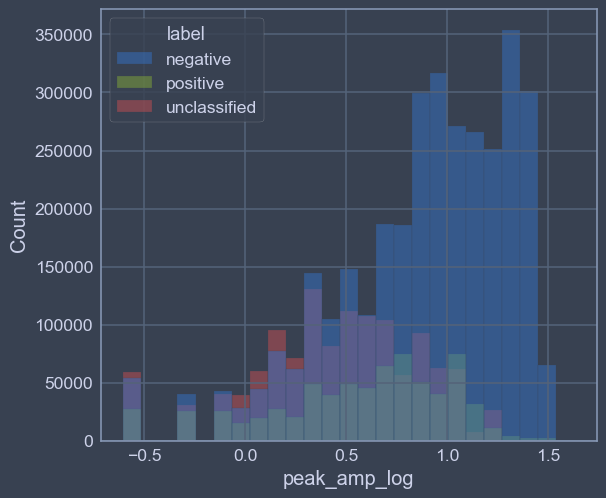

In [37]:
sns.histplot(data=df.filter(pl.col("peak_amp_log").is_not_nan()), x="peak_amp_log", hue="label", bins=25)

<Axes: xlabel='phase_angle', ylabel='peak_amplitude'>

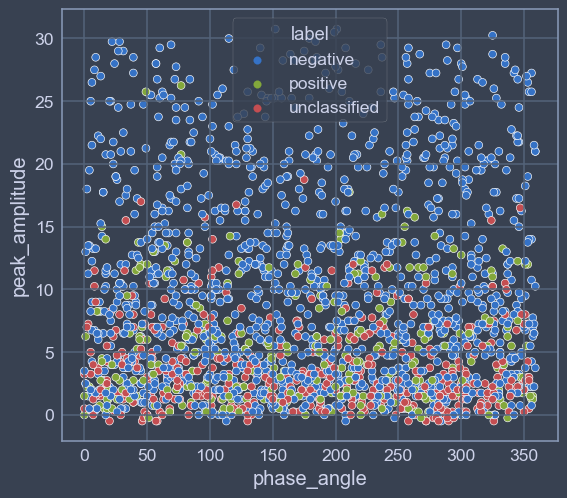

In [8]:
sns.scatterplot(data=df.sample(2000, shuffle=True), x="phase_angle", y="peak_amplitude", hue="label", hue_order=["negative", "positive", "unclassified"])

# Data Cleaning

The intution is that noise is whatever signal that does not contribute to the classification of an individual point

In [3]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [102]:
X = df.filter(pl.col("label") != "unclassified")[["integral", "phase_angle", "cycle_number", "rise_time", "pulse_width", "peak_amp_db"]].clone()
Y = df.filter(pl.col("label") != "unclassified")["label"].clone()
Y = Y.apply(lambda x: 0 if x == "negative" else 1).alias("label")

In [103]:
X[["peak_amp_db", "phase_angle"]].describe()

shape: (7, 3)
┌────────────┬─────────────┬─────────────┐
│ describe   ┆ peak_amp_db ┆ phase_angle │
│ ---        ┆ ---         ┆ ---         │
│ str        ┆ f64         ┆ f64         │
╞════════════╪═════════════╪═════════════╡
│ count      ┆ 4.051412e6  ┆ 4.051412e6  │
│ null_count ┆ 0.0         ┆ 0.0         │
│ mean       ┆ 8.210764    ┆ 179.16985   │
│ std        ┆ 4.629319    ┆ 103.277585  │
│ min        ┆ -6.0206     ┆ 0.0         │
│ max        ┆ 16.309361   ┆ 359.0       │
│ median     ┆ 9.0309      ┆ 179.0       │
└────────────┴─────────────┴─────────────┘

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X[["peak_amp_db", "phase_angle"]].to_numpy(), Y.to_numpy(), random_state=42, shuffle=True, stratify=Y)

In [105]:
ss = StandardScaler()
ss.fit(x_train[:,0].reshape(-1, 1))

StandardScaler()

In [53]:
model = LinearSVC(dual=False, verbose=1, random_state=42, class_weight="balanced")

In [54]:
x_train[0], y_train[0]

(array([ 13.89166084, 277.        ]), 0)

In [61]:
ss.transform(x_train[:,0].reshape(-1, 1)).shape

(3038559, 1)

In [ ]:
x_train_scaled = np.concatenate((ss.transform(x_train[:,0].reshape(-1, 1)), x_train[:,1].reshape(-1, 1)), axis=1)

In [106]:
x_train_scaled = zscaler(x_train, 0, ss)
x_test_scaled = zscaler(x_test, 0, ss)

In [113]:
x_train_scaled[:,0].mean(), x_train[:,0].mean()

(-5.165850550943235e-16, 8.21090624791033)

In [112]:
ss.transform([[15.882717068423291]]), ss.inverse_transform([[1.6573925051985845]])

(array([[1.65739251]]), array([[15.88271707]]))

In [66]:
def zscaler(x, col, scaler):
    _, num_features = x.shape
    features_before = x[:,:col]
    feature = x[:,col].reshape(-1,1)
    features_after = x[:,col+1:]
    scaled_feature = scaler.transform(feature)
    return np.concatenate((features_before, scaled_feature, features_after), axis=1)

In [69]:
model.fit(x_train_scaled, y_train)

[LibLinear]

LinearSVC(class_weight='balanced', dual=False, random_state=42, verbose=1)

In [100]:
x_test[:,0].max()

16.309361190641912

<Axes: ylabel='Density'>

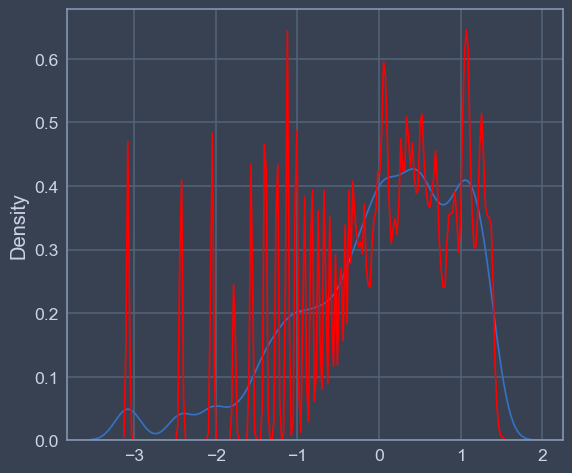

In [114]:
ax = sns.kdeplot(data=x_test_scaled[:10000, 0])
sns.kdeplot(data=x_train_scaled[:10000, 0], ax=ax, color="red", bw_adjust=0.1, thresh=0.0)

In [70]:
y_pred = model.decision_function(x_test_scaled)
y_pred

array([-0.09603934,  0.39546638, -0.30992217, ..., -0.26360288,
       -0.12574581,  0.0677558 ])

StandardScaler()

In [75]:
preds_np = np.concatenate((x_test_scaled, y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)

In [76]:
preds_np[0]

array([ 5.18648217e-02,  2.13000000e+02, -9.60393390e-02,  0.00000000e+00])

In [77]:
# preds = pl.DataFrame(preds_np, schema=["integral", "phase_angle", "cycle_number", "rise_time", "pulse_width", "peak_amp_db", "proba", "label"])
preds = pl.DataFrame(preds_np, schema=["peak_amp_db", "phase_angle", "proba", "label"])
preds

shape: (1012853, 4)
┌─────────────┬─────────────┬───────────┬───────┐
│ peak_amp_db ┆ phase_angle ┆ proba     ┆ label │
│ ---         ┆ ---         ┆ ---       ┆ ---   │
│ f64         ┆ f64         ┆ f64       ┆ f64   │
╞═════════════╪═════════════╪═══════════╪═══════╡
│ 0.051865    ┆ 213.0       ┆ -0.096039 ┆ 0.0   │
│ -1.393435   ┆ 97.0        ┆ 0.395466  ┆ 0.0   │
│ 0.870464    ┆ 7.0         ┆ -0.309922 ┆ 0.0   │
│ 1.093725    ┆ 273.0       ┆ -0.444739 ┆ 0.0   │
│ ...         ┆ ...         ┆ ...       ┆ ...   │
│ 0.963699    ┆ 103.0       ┆ -0.362642 ┆ 0.0   │
│ 0.55757     ┆ 235.0       ┆ -0.263603 ┆ 1.0   │
│ 0.147361    ┆ 209.0       ┆ -0.125746 ┆ 0.0   │
│ -0.311951   ┆ 15.0        ┆ 0.067756  ┆ 0.0   │
└─────────────┴─────────────┴───────────┴───────┘

In [79]:
preds = preds.with_columns(pl.col("proba").apply(np.abs).alias("abs_proba"))

<Axes: xlabel='peak_amp_db', ylabel='abs_proba'>

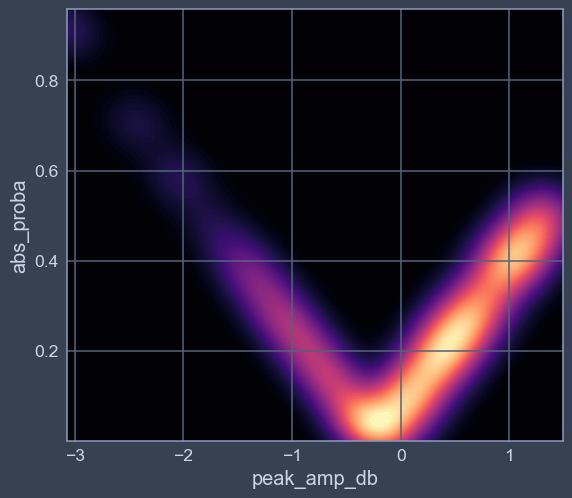

In [80]:
sns.kdeplot(
    data=preds.sample(10000, shuffle=True, seed=42),
    x="peak_amp_db",
    y="abs_proba",
    levels=100,
    cut=0,
    fill=True,
    thresh=0.0,
    cmap="magma",
)

In [92]:
ss.n_features_in_

1

In [96]:
ss.transform([[8]])

array([[-0.04556348]])

In [130]:
ss.inverse_transform([[0.8]]) # threshold for noise

array([[11.91398119]])

In [36]:
df_noise_filtered = df.filter(pl.col("peak_amp_db") > 11.9)

In [145]:
df_noise_filtered.filter(pl.col("file") == df_noise_filtered.filter(pl.col("label") == "positive")["file"].unique()[10]).filter(pl.col("rise_time") > 0).filter(pl.col("pulse_width") > 0)

shape: (17, 9)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬─────────────┬──────────┬─────────┬─────────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ pulse_width ┆ label    ┆ file    ┆ peak_amp_db │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---         ┆ ---      ┆ ---     ┆ ---         │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ i64         ┆ str      ┆ str     ┆ f64         │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═════════════╪══════════╪═════════╪═════════════╡
│ 15.5           ┆ 5394     ┆ 342         ┆ 40663        ┆ ... ┆ 2           ┆ positive ┆ 2147885 ┆ 11.903317   │
│ 16.25          ┆ 6124     ┆ 359         ┆ 40716        ┆ ... ┆ 23          ┆ positive ┆ 2147885 ┆ 12.108534   │
│ 16.5           ┆ 5679     ┆ 344         ┆ 40725        ┆ ... ┆ 22          ┆ positive ┆ 2147885 ┆ 12.174839   │
│ 17.5           ┆ 4799     ┆ 342         ┆ 40783        ┆ ... ┆ 22          ┆ positive ┆ 2147885 ┆ 12.43038    │
│ ...            ┆ ...      ┆ ...         ┆ ...          ┆ ... ┆ ...         ┆ ...      ┆ ...     ┆ ...         │
│ 15.5           ┆ 4004     ┆ 349         ┆ 41091        ┆ ... ┆ 3           ┆ positive ┆ 2147885 ┆ 11.903317   │
│ 17.0           ┆ 6524     ┆ 355         ┆ 41132        ┆ ... ┆ 2           ┆ positive ┆ 2147885 ┆ 12.304489   │
│ 15.5           ┆ 4222     ┆ 322         ┆ 41138        ┆ ... ┆ 22          ┆ positive ┆ 2147885 ┆ 11.903317   │
│ 16.25          ┆ 6407     ┆ 326         ┆ 41139        ┆ ... ┆ 23          ┆ positive ┆ 2147885 ┆ 12.108534   │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴─────────────┴──────────┴─────────┴─────────────┘

<Axes: xlabel='phase_angle', ylabel='peak_amplitude'>

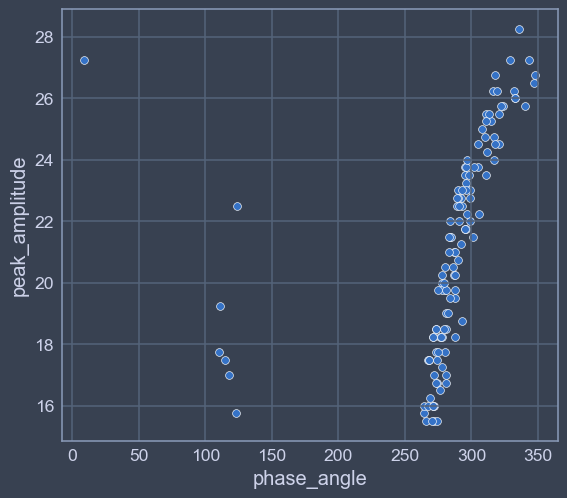

In [155]:
sns.scatterplot(
#     df_noise_filtered.filter(pl.col("file") == df.filter(pl.col("label") == "positive")["file"].unique()[0])\
#     .filter(pl.col("rise_time") > 0)\
#     .filter(pl.col("pulse_width") > 0),
    df_noise_filtered.filter(pl.col("file") == df.filter(pl.col("label") == "positive")["file"].unique()[10]),
    x="phase_angle", y="peak_amplitude")

# Clustering

In [30]:
from sklearn.manifold import TSNE
import hdbscan

In [56]:
negative_sample = df_noise_filtered.filter(pl.col("file") == df_noise_filtered.filter(pl.col("label") == "negative")["file"].unique()[10])
# negative_sample = df.filter(pl.col("file") == df.filter(pl.col("label") == "positive")["file"].unique()[10])
# negative_sample = negative_sample[["peak_amp_db", "phase_angle", "integral", "cycle_number", "rise_time", "pulse_width"]]
negative_sample = negative_sample[["polar_x", "polar_y", "integral", "cycle_number", "rise_time", "pulse_width"]]
negative_sample
# negative_sample = negative_sample[["peak_amp_db", "phase_angle"]]
# negative_sample = negative_sample.to_pandas()
negative_sample = negative_sample.to_numpy()

In [84]:
positive_sample = df_noise_filtered.filter(pl.col("file") == df_noise_filtered.filter(pl.col("label") == "positive")["file"].unique().sort()[10])
# negative_sample = df.filter(pl.col("file") == df.filter(pl.col("label") == "positive")["file"].unique()[10])
# negative_sample = negative_sample[["peak_amp_db", "phase_angle", "integral", "cycle_number", "rise_time", "pulse_width"]]
positive_sample = positive_sample[["polar_x", "polar_y", "integral", "cycle_number", "rise_time", "pulse_width"]]
positive_sample
# negative_sample = negative_sample[["peak_amp_db", "phase_angle"]]
# negative_sample = negative_sample.to_pandas()
positive_sample = positive_sample.to_numpy()

In [76]:
negative_sample[0], len(negative_sample)

(array([ 1.96484885e+01,  4.89891839e+00, -7.03500000e+03,  3.27050000e+04,
         0.00000000e+00,  4.00000000e+00]),
 15879)

In [85]:
positive_sample[0], len(positive_sample)

(array([1.08122534e+00, 1.54622428e+01, 4.86700000e+03, 1.52940000e+04,
        2.00000000e+00, 5.00000000e+01]),
 75)

In [58]:
neg_clusterer = hdbscan.HDBSCAN(min_cluster_size=len(negative_sample)//100+2, min_samples=len(negative_sample)//30+2,).fit(negative_sample)

In [78]:
pos_clusterer = hdbscan.HDBSCAN(min_cluster_size=len(positive_sample)//100+2, min_samples=len(positive_sample)//30+2,).fit(positive_sample)

In [59]:
neg_clusterer.labels_.max(), pos_clusterer.labels_.max()

(1, 3)

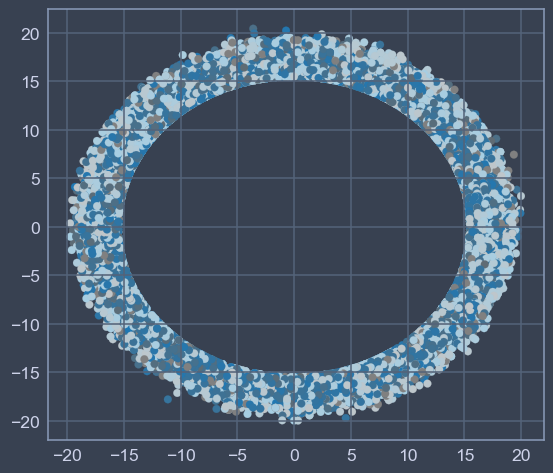

In [48]:
plt.scatter(
    negative_sample[:, 1],
    negative_sample[:, 0],
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', 12)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in neg_clusterer.labels_],
        neg_clusterer.probabilities_
    )]
)

(-20.0, 20.0)

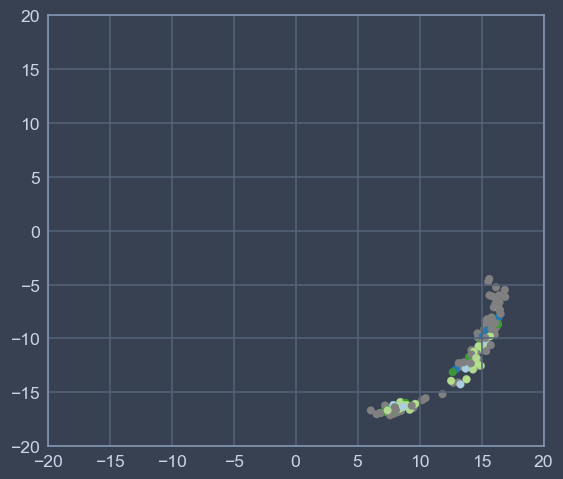

In [82]:
plt.scatter(
    positive_sample[:, 0],
    positive_sample[:, 1],
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', 12)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in pos_clusterer.labels_],
        pos_clusterer.probabilities_
    )]
)
plt.ylim([-20, 20])
plt.xlim([-20, 20])

In [86]:
low_d_clusterer = hdbscan.HDBSCAN(min_cluster_size=len(positive_sample)//100+2, min_samples=len(positive_sample)//30+2,).fit(positive_sample[:, 0:2])

(-20.0, 20.0)

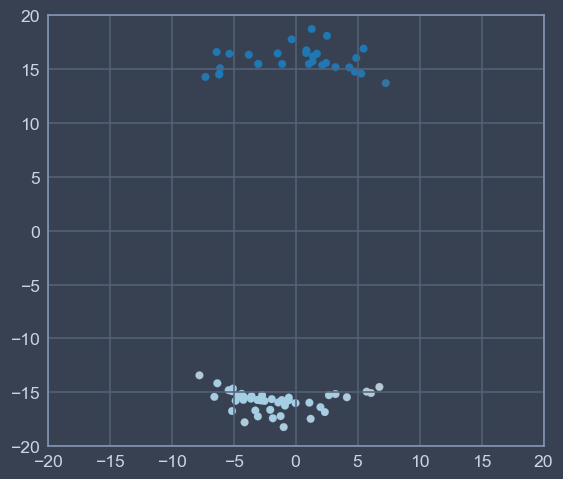

In [87]:
plt.scatter(
    positive_sample[:, 0],
    positive_sample[:, 1],
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', 12)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in low_d_clusterer.labels_],
        low_d_clusterer.probabilities_
    )]
)
plt.ylim([-20, 20])
plt.xlim([-20, 20])

In [49]:
neg_projection = TSNE(n_components=3).fit_transform(negative_sample)

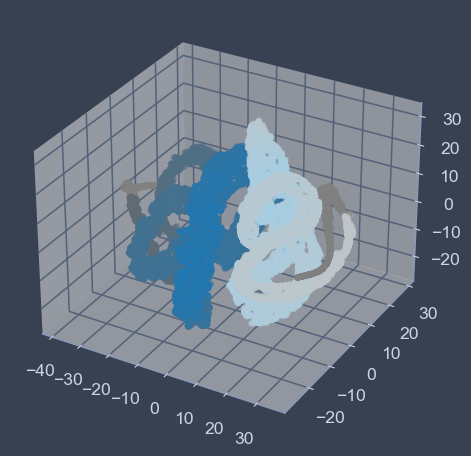

In [50]:
ax = plt.axes(projection='3d')
ax.scatter3D(
    *neg_projection.T,
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', neg_clusterer.labels_.max() + 2)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in neg_clusterer.labels_],
        neg_clusterer.probabilities_
    )],
)

In [70]:
pos_projection = TSNE(n_components=3).fit_transform(positive_sample)

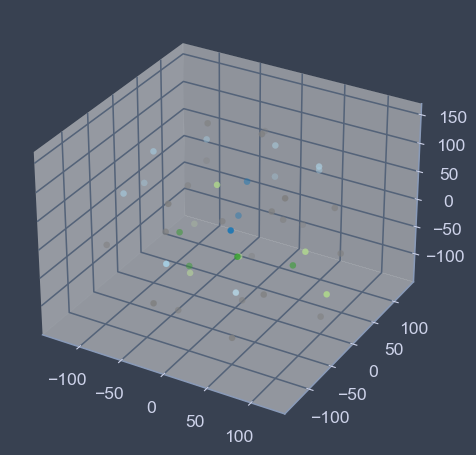

In [71]:
ax = plt.axes(projection='3d')
ax.scatter3D(
    *pos_projection.T,
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', pos_clusterer.labels_.max() + 2)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in pos_clusterer.labels_],
        pos_clusterer.probabilities_
    )],
)

In [66]:
pos_projection_2d = TSNE(n_components=2).fit_transform(positive_sample)

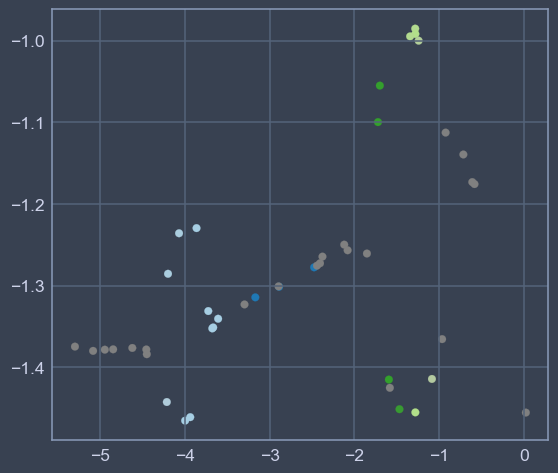

In [69]:
# ax = plt.axes(projection='3d')
plt.scatter(
    *pos_projection_2d.T,
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', pos_clusterer.labels_.max() + 2)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in pos_clusterer.labels_],
        pos_clusterer.probabilities_
    )],
)

# Clustering for all

In [89]:
df_noise_filtered.schema

{'peak_amplitude': Float64,
 'integral': Int64,
 'phase_angle': Int64,
 'cycle_number': Int64,
 'rise_time': Int64,
 'pulse_width': Int64,
 'label': Utf8,
 'file': Utf8,
 'peak_amp_db': Float64,
 'phase_rad': Float64,
 'polar_x': Float64,
 'polar_y': Float64}

In [99]:
df_noise_filtered.filter(pl.col("file") == "1011083")

shape: (16166, 12)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬─────────────┬───────────┬────────────┬────────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ peak_amp_db ┆ phase_rad ┆ polar_x    ┆ polar_y    │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---         ┆ ---       ┆ ---        ┆ ---        │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ f64         ┆ f64       ┆ f64        ┆ f64        │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═════════════╪═══════════╪════════════╪════════════╡
│ 23.5           ┆ 18998    ┆ 130         ┆ 25705        ┆ ... ┆ 13.710679   ┆ 2.268928  ┆ -15.105509 ┆ 18.002044  │
│ 22.25          ┆ 56717    ┆ 132         ┆ 25705        ┆ ... ┆ 13.4733     ┆ 2.303835  ┆ -14.888156 ┆ 16.534972  │
│ 23.0           ┆ 3915     ┆ 132         ┆ 25705        ┆ ... ┆ 13.617278   ┆ 2.303835  ┆ -15.390004 ┆ 17.092331  │
│ 24.25          ┆ 19811    ┆ 133         ┆ 25705        ┆ ... ┆ 13.847117   ┆ 2.321288  ┆ -16.53846  ┆ 17.735327  │
│ ...            ┆ ...      ┆ ...         ┆ ...          ┆ ... ┆ ...         ┆ ...       ┆ ...        ┆ ...        │
│ 25.5           ┆ 18551    ┆ 202         ┆ 26197        ┆ ... ┆ 14.065402   ┆ 3.525565  ┆ -23.643188 ┆ -9.552468  │
│ 23.75          ┆ 11732    ┆ 203         ┆ 26197        ┆ ... ┆ 13.756636   ┆ 3.543018  ┆ -21.86199  ┆ -9.279864  │
│ 24.75          ┆ 23589    ┆ 203         ┆ 26197        ┆ ... ┆ 13.935752   ┆ 3.543018  ┆ -22.782495 ┆ -9.670595  │
│ 24.75          ┆ 38869    ┆ 204         ┆ 26197        ┆ ... ┆ 13.935752   ┆ 3.560472  ┆ -22.61025  ┆ -10.066732 │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴─────────────┴───────────┴────────────┴────────────┘

In [104]:
sorted([len(df_noise_filtered.filter(pl.col("file") == file)) for file in df_noise_filtered["file"].unique().sort()])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 5,
 6,
 12,
 12,
 14,
 14,
 16,
 18,
 22,
 25,
 26,
 29,
 32,
 33,
 36,
 37,
 37,
 40,
 44,
 45,
 45,
 48,
 49,
 55,
 57,
 61,
 63,
 64,
 64,
 65,
 71,
 75,
 76,
 76,
 79,
 89,
 90,
 90,
 91,
 93,
 95,
 98,
 100,
 119,
 123,
 124,
 125,
 133,
 137,
 157,
 159,
 166,
 168,
 182,
 199,
 199,
 228,
 236,
 236,
 250,
 263,
 276,
 291,
 301,
 310,
 311,
 327,
 330,
 331,
 336,
 338,
 389,
 393,
 421,
 425,
 431,
 463,
 507,
 545,
 641,
 645,
 740,
 859,
 1283,
 1451,
 1475,
 1615,
 1677,
 1826,
 2173,
 2191,
 2623,
 3730,
 6377,
 6991,
 9675,
 10715,
 11037,
 12154,
 12197,
 12314,
 13631,
 14782,
 14888,
 14945,
 15815,
 15879,
 16077,
 16114,
 16166,
 16262,
 16436,
 16472,
 16631,
 16650,
 16801,
 16969,
 17123,
 17305,
 17546,
 18179,
 18709,
 18968,
 19146,
 19186,
 19208,
 19318,
 19556,
 19650,
 19747,
 19772,
 19973,
 20423,
 20510,
 20527,
 20558,
 20667,
 20889,
 21040,
 21093,
 21208,
 21220,
 21279,
 21347,
 21409,
 21618,

In [111]:
df_filtered = None
for file in tqdm(df_noise_filtered["file"].unique().sort()):
    if len(df_noise_filtered.filter(pl.col("file") == file)) > 6:
        if df_filtered is None:
            df_filtered = df_noise_filtered.filter(pl.col("file") == file)
        else:
            df_filtered = pl.concat([df_filtered, df_noise_filtered.filter(pl.col("file") == file)])

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [00:01<00:00, 97.51it/s]


In [168]:
negative_clusters = None
for file in tqdm(df_filtered.filter(pl.col("label") == "negative")["file"].unique().sort()):
    data = df_filtered.filter(pl.col("file") == file)
    np_data = data[["polar_x", "polar_y"]].to_numpy()
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=len(np_data)//200+2,
        min_samples=len(np_data)//30+2,
        cluster_selection_epsilon=0.5
    ).fit(np_data)
    data = data.with_columns(
        pl.Series(name="cluster", values=clusterer.labels_),
        pl.Series(name="cluster_proba", values=clusterer.probabilities_)
    )
    if negative_clusters is None:
        negative_clusters = data
    else:
        negative_clusters = pl.concat([negative_clusters, data])

100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:42<00:00,  2.19it/s]


In [164]:
positive_clusters = None
for file in tqdm(df_filtered.filter(pl.col("label") == "positive")["file"].unique().sort()):
    data = df_filtered.filter(pl.col("file") == file)
    np_data = data[["polar_x", "polar_y"]].to_numpy()
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=len(np_data)//200+2,
        min_samples=len(np_data)//30+2,
        cluster_selection_epsilon=0.5
    ).fit(np_data)
    data = data.with_columns(
        pl.Series(name="cluster", values=clusterer.labels_),
        pl.Series(name="cluster_proba", values=clusterer.probabilities_)
    )
    if positive_clusters is None:
        positive_clusters = data
    else:
        positive_clusters = pl.concat([positive_clusters, data])

100%|█████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 112.76it/s]


In [115]:
positive_clusters

shape: (19618, 13)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬───────────┬────────────┬───────────┬─────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ phase_rad ┆ polar_x    ┆ polar_y   ┆ cluster │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---       ┆ ---        ┆ ---       ┆ ---     │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ f64       ┆ f64        ┆ f64       ┆ i64     │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═══════════╪════════════╪═══════════╪═════════╡
│ 15.5           ┆ 6217     ┆ 201         ┆ 1419         ┆ ... ┆ 3.508112  ┆ -14.470497 ┆ -5.554703 ┆ 0       │
│ 17.25          ┆ 6747     ┆ 201         ┆ 1422         ┆ ... ┆ 3.508112  ┆ -16.104262 ┆ -6.181847 ┆ 0       │
│ 19.0           ┆ 8702     ┆ 5           ┆ 1431         ┆ ... ┆ 0.087266  ┆ 18.927699  ┆ 1.655959  ┆ 1       │
│ 15.5           ┆ 5370     ┆ 352         ┆ 1448         ┆ ... ┆ 6.143559  ┆ 15.349155  ┆ -2.157183 ┆ 1       │
│ ...            ┆ ...      ┆ ...         ┆ ...          ┆ ... ┆ ...       ┆ ...        ┆ ...       ┆ ...     │
│ 26.25          ┆ 12160    ┆ 200         ┆ 51569        ┆ ... ┆ 3.490659  ┆ -24.666931 ┆ -8.978029 ┆ 0       │
│ 16.25          ┆ 4859     ┆ 349         ┆ 51569        ┆ ... ┆ 6.091199  ┆ 15.951442  ┆ -3.100646 ┆ 1       │
│ 17.5           ┆ 2341     ┆ 337         ┆ 51570        ┆ ... ┆ 5.88176   ┆ 16.108835  ┆ -6.837795 ┆ 1       │
│ 17.25          ┆ 8962     ┆ 359         ┆ 51571        ┆ ... ┆ 6.265732  ┆ 17.247373  ┆ -0.301054 ┆ 1       │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴───────────┴────────────┴───────────┴─────────┘

In [172]:
positive_clusters.groupby("file").agg(pl.col("cluster").max()).sort(by="cluster")

shape: (51, 2)
┌─────────┬─────────┐
│ file    ┆ cluster │
│ ---     ┆ ---     │
│ str     ┆ i64     │
╞═════════╪═════════╡
│ 1935350 ┆ 1       │
│ 5964589 ┆ 1       │
│ 1167250 ┆ 1       │
│ 1603077 ┆ 1       │
│ ...     ┆ ...     │
│ 5804341 ┆ 5       │
│ 4071670 ┆ 5       │
│ 5755371 ┆ 7       │
│ 1609861 ┆ 7       │
└─────────┴─────────┘

In [139]:
df()

shape: (7, 13)
┌────────────┬────────────────┬──────────────┬─────────────┬─────┬─────────────┬────────────┬─────────────┬────────────┐
│ describe   ┆ peak_amplitude ┆ integral     ┆ phase_angle ┆ ... ┆ peak_amp_db ┆ phase_rad  ┆ polar_x     ┆ polar_y    │
│ ---        ┆ ---            ┆ ---          ┆ ---         ┆     ┆ ---         ┆ ---        ┆ ---         ┆ ---        │
│ str        ┆ f64            ┆ f64          ┆ f64         ┆     ┆ f64         ┆ f64        ┆ f64         ┆ f64        │
╞════════════╪════════════════╪══════════════╪═════════════╪═════╪═════════════╪════════════╪═════════════╪════════════╡
│ count      ┆ 5.291244e6     ┆ 5.291244e6   ┆ 5.291244e6  ┆ ... ┆ 5.291244e6  ┆ 5.291244e6 ┆ 5.291244e6  ┆ 5.291244e6 │
│ null_count ┆ 0.0            ┆ 0.0          ┆ 0.0         ┆ ... ┆ 0.0         ┆ 0.0        ┆ 0.0         ┆ 0.0        │
│ mean       ┆ 8.683517       ┆ 1700.475217  ┆ 179.249455  ┆ ... ┆ 7.326295    ┆ 3.128493   ┆ -0.028163   ┆ 0.033869   │
│ std        ┆ 7.545439       ┆ 15033.407818 ┆ 103.404845  ┆ ... ┆ 4.794983    ┆ 1.804755   ┆ 8.087797    ┆ 8.180631   │
│ min        ┆ 0.25           ┆ -187175.0    ┆ 0.0         ┆ ... ┆ -6.0206     ┆ 0.0        ┆ -35.863009  ┆ -39.054068 │
│ max        ┆ 42.75          ┆ 148246.0     ┆ 359.0       ┆ ... ┆ 16.309361   ┆ 6.265732   ┆ 38.289093   ┆ 33.813744  │
│ median     ┆ 6.5            ┆ 1866.0       ┆ 179.0       ┆ ... ┆ 8.129134    ┆ 3.124139   ┆ -2.3421e-15 ┆ 8.2664e-16 │
└────────────┴────────────────┴──────────────┴─────────────┴─────┴─────────────┴────────────┴─────────────┴────────────┘

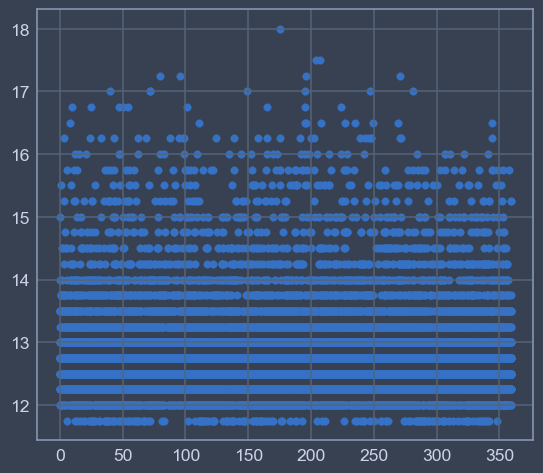

In [170]:
plt.scatter(
    df.filter(pl.col("file") == "6189252")["phase_angle"],
    df.filter(pl.col("file") == "6189252")["peak_amplitude"]
)

(-20.0, 20.0)

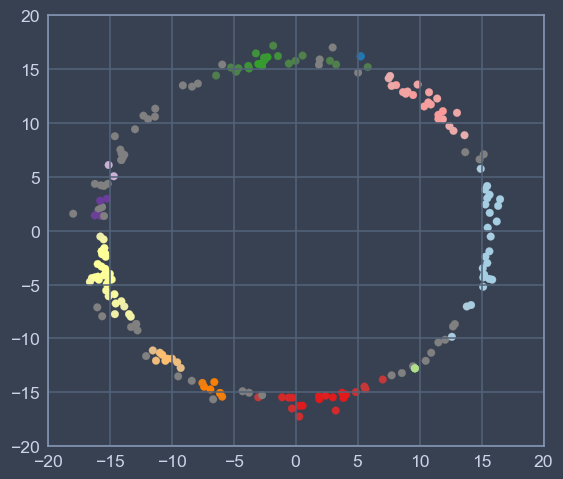

In [171]:
plt.scatter(
    negative_clusters.filter(pl.col("file") == "6189252")["polar_x"],
    negative_clusters.filter(pl.col("file") == "6189252")["polar_y"],
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', 12)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in negative_clusters.filter(pl.col("file") == "6189252")["cluster"]],
        negative_clusters.filter(pl.col("file") == "6189252")["cluster_proba"]
    )]
)
plt.ylim([-20, 20])
plt.xlim([-20, 20])

(-20.0, 20.0)

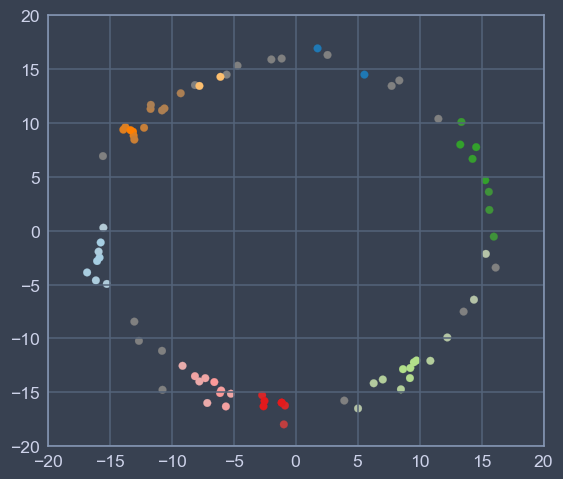

In [166]:
plt.scatter(
    positive_clusters.filter(pl.col("file") == "5755371")["polar_x"],
    positive_clusters.filter(pl.col("file") == "5755371")["polar_y"],
    c=[sns.desaturate(x, p) for x, p in zip(
        [sns.color_palette('Paired', 30)[x] if x >= 0 else (0.5, 0.5, 0.5) for x in positive_clusters.filter(pl.col("file") == "5755371")["cluster"]],
        positive_clusters.filter(pl.col("file") == "5755371")["cluster_proba"]
    )]
)
plt.ylim([-20, 20])
plt.xlim([-20, 20])

# Cluster Feature Extraction

In [201]:
from sklearn.linear_model import LinearRegression
def cluster_feature_extraction(data):
    # data should be for a single cluster only.
    min_theta = data["phase_rad"].min()
    max_theta = data["phase_rad"].max()
    span = 0
    shifted_data = data
    if min_theta <= np.pi / 2 and max_theta >= (3 * np.pi) / 2:
#         print(min_theta, max_theta)
        min_theta = data.filter(pl.col("phase_rad") < np.pi)["phase_rad"].max()
        max_theta = data.filter(pl.col("phase_rad") > np.pi)["phase_rad"].min()
        span = min_theta + 2 * np.pi - max_theta
        shifted_data = data.with_columns(
            (pl.col("phase_rad") - (2 * np.pi - max_theta)).alias("phase_rad"),
            (pl.col("phase_angle") - (360 - np.rad2deg(max_theta))).alias("phase_angle")
        )
    else:
        span = max_theta - min_theta
    mean = data["peak_amplitude"].mean()
    model = LinearRegression().fit(data["phase_rad"].to_numpy().reshape(-1, 1), data["peak_amplitude"])
    m = model.coef_[0]
    v = np.array([1, m])
    v = np.linalg.norm(v)
    projected_points = np.array([np.dot(x, v) for x in data[["phase_rad", "peak_amplitude"]].to_numpy()])
    std_dev = projected_points.std()
    return span, mean, m, std_dev

In [218]:
schema = [f"cluster_{i+1}_{feature}" for i in range(4) for feature in ["span", "mean", "grad", "std"]]
schema.append("file")
print(schema)
positive_cluster_features = None
for file in tqdm(positive_clusters["file"].unique().sort()):
    data = positive_clusters.filter(pl.col("file") == file)
    num_clusters = len(data["cluster"].unique().sort())
    cluster_sizes = [len(data.filter(pl.col("cluster") == cluster)) for cluster in data["cluster"].unique().sort()]
    res = {}
    for i in range(min(num_clusters, 4)):
        biggest_cluster_idx = int(np.argmax(np.array(cluster_sizes)))
        cluster_id = data["cluster"].unique().sort()[biggest_cluster_idx]
        features = cluster_feature_extraction(data.filter(pl.col("cluster") == cluster_id))
#         features_dict = {
#             "span": features[0],
#             "mean": features[1],
#             "grad": features[2],
#             "std": features[3],
#             "file": file
#         }
        res[f"cluster_{i+1}_span"] = features[0]
        res[f"cluster_{i+1}_mean"] = features[1]
        res[f"cluster_{i+1}_grad"] = features[2]
        res[f"cluster_{i+2}_std"] = features[3]
        cluster_sizes.pop(biggest_cluster_idx)
    if num_clusters < 4:
        for i in range(num_clusters, 4):
            res[f"cluster_{i+1}_span"] = 0.0
            res[f"cluster_{i+1}_mean"] = 0.0
            res[f"cluster_{i+1}_grad"] = 0.0
            res[f"cluster_{i+2}_std"] = 0.0
    res["file"] = file
    res = pl.DataFrame(res, schema=schema)
    if positive_cluster_features is None:
        positive_cluster_features = res
    else:
        positive_cluster_features = pl.concat([positive_cluster_features, res])

['cluster_1_span', 'cluster_1_mean', 'cluster_1_grad', 'cluster_1_std', 'cluster_2_span', 'cluster_2_mean', 'cluster_2_grad', 'cluster_2_std', 'cluster_3_span', 'cluster_3_mean', 'cluster_3_grad', 'cluster_3_std', 'cluster_4_span', 'cluster_4_mean', 'cluster_4_grad', 'cluster_4_std', 'file']


100%|█████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 212.37it/s]


In [219]:
positive_cluster_features.head()

shape: (5, 17)
┌────────────┬──────────────┬──────────────┬──────────────┬─────┬──────────────┬──────────────┬──────────────┬─────────┐
│ cluster_1_ ┆ cluster_1_me ┆ cluster_1_gr ┆ cluster_1_st ┆ ... ┆ cluster_4_me ┆ cluster_4_gr ┆ cluster_4_st ┆ file    │
│ span       ┆ an           ┆ ad           ┆ d            ┆     ┆ an           ┆ ad           ┆ d            ┆ ---     │
│ ---        ┆ ---          ┆ ---          ┆ ---          ┆     ┆ ---          ┆ ---          ┆ ---          ┆ str     │
│ f64        ┆ f64          ┆ f64          ┆ f64          ┆     ┆ f64          ┆ f64          ┆ f64          ┆         │
╞════════════╪══════════════╪══════════════╪══════════════╪═════╪══════════════╪══════════════╪══════════════╪═════════╡
│ 1.239184   ┆ 17.334821    ┆ -0.097751    ┆ 7.718903     ┆ ... ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 1054130 │
│ 1.797689   ┆ 27.150838    ┆ 15.341443    ┆ 184.025655   ┆ ... ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 1167250 │
│ 0.663225   ┆ 16.977778    ┆ -1.883207    ┆ 12.997187    ┆ ... ┆ 16.369048    ┆ 0.277388     ┆ 6.213289     ┆ 1494273 │
│ 2.879793   ┆ 18.853448    ┆ 0.554875     ┆ 8.454402     ┆ ... ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 1603077 │
│ 3.438299   ┆ 18.205128    ┆ 1.769237     ┆ 14.799642    ┆ ... ┆ 18.205128    ┆ 1.769237     ┆ 14.799642    ┆ 1609861 │
└────────────┴──────────────┴──────────────┴──────────────┴─────┴──────────────┴──────────────┴──────────────┴─────────┘

In [220]:
schema = [f"cluster_{i+1}_{feature}" for i in range(4) for feature in ["span", "mean", "grad", "std"]]
schema.append("file")
print(schema)
negative_cluster_features = None
for file in tqdm(negative_clusters["file"].unique().sort()):
    data = negative_clusters.filter(pl.col("file") == file)
    num_clusters = len(data["cluster"].unique().sort())
    cluster_sizes = [len(data.filter(pl.col("cluster") == cluster)) for cluster in data["cluster"].unique().sort()]
    res = {}
    for i in range(min(num_clusters, 4)):
        biggest_cluster_idx = int(np.argmax(np.array(cluster_sizes)))
        cluster_id = data["cluster"].unique().sort()[biggest_cluster_idx]
        features = cluster_feature_extraction(data.filter(pl.col("cluster") == cluster_id))
        res[f"cluster_{i+1}_span"] = features[0]
        res[f"cluster_{i+1}_mean"] = features[1]
        res[f"cluster_{i+1}_grad"] = features[2]
        res[f"cluster_{i+2}_std"] = features[3]
        cluster_sizes.pop(biggest_cluster_idx)
    if num_clusters < 4:
        for i in range(num_clusters, 4):
            res[f"cluster_{i+1}_span"] = 0.0
            res[f"cluster_{i+1}_mean"] = 0.0
            res[f"cluster_{i+1}_grad"] = 0.0
            res[f"cluster_{i+2}_std"] = 0.0
    res["file"] = file
    res = pl.DataFrame(res, schema=schema)
    if negative_cluster_features is None:
        negative_cluster_features = res
    else:
        negative_cluster_features = pl.concat([negative_cluster_features, res])

['cluster_1_span', 'cluster_1_mean', 'cluster_1_grad', 'cluster_1_std', 'cluster_2_span', 'cluster_2_mean', 'cluster_2_grad', 'cluster_2_std', 'cluster_3_span', 'cluster_3_mean', 'cluster_3_grad', 'cluster_3_std', 'cluster_4_span', 'cluster_4_mean', 'cluster_4_grad', 'cluster_4_std', 'file']


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:02<00:00, 37.86it/s]


In [221]:
negative_cluster_features.head()

shape: (5, 17)
┌────────────┬──────────────┬──────────────┬──────────────┬─────┬──────────────┬──────────────┬──────────────┬─────────┐
│ cluster_1_ ┆ cluster_1_me ┆ cluster_1_gr ┆ cluster_1_st ┆ ... ┆ cluster_4_me ┆ cluster_4_gr ┆ cluster_4_st ┆ file    │
│ span       ┆ an           ┆ ad           ┆ d            ┆     ┆ an           ┆ ad           ┆ d            ┆ ---     │
│ ---        ┆ ---          ┆ ---          ┆ ---          ┆     ┆ ---          ┆ ---          ┆ ---          ┆ str     │
│ f64        ┆ f64          ┆ f64          ┆ f64          ┆     ┆ f64          ┆ f64          ┆ f64          ┆         │
╞════════════╪══════════════╪══════════════╪══════════════╪═════╪══════════════╪══════════════╪══════════════╪═════════╡
│ 6.248279   ┆ 23.459724    ┆ 0.00302      ┆ 10.391475    ┆ ... ┆ 23.181818    ┆ 1.186711     ┆ 13.220307    ┆ 1011083 │
│ 0.802851   ┆ 18.223748    ┆ 0.098305     ┆ 6.987133     ┆ ... ┆ 18.001413    ┆ -0.632804    ┆ 9.369066     ┆ 1015896 │
│ 3.961897   ┆ 24.111556    ┆ 0.023273     ┆ 10.784243    ┆ ... ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 1029777 │
│ 6.248279   ┆ 26.361616    ┆ -0.044311    ┆ 12.317894    ┆ ... ┆ 24.723427    ┆ -0.044301    ┆ 11.046842    ┆ 1089139 │
│ 0.785398   ┆ 19.0625      ┆ -3.195225    ┆ 24.753734    ┆ ... ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 1194291 │
└────────────┴──────────────┴──────────────┴──────────────┴─────┴──────────────┴──────────────┴──────────────┴─────────┘

In [223]:
positive_cluster_features = positive_cluster_features.with_columns(pl.lit(1).alias("label"))
negative_cluster_features = negative_cluster_features.with_columns(pl.lit(0).alias("label"))
df_features_extracted = pl.concat([positive_cluster_features, negative_cluster_features])

In [224]:
df_features_extracted.write_csv("polars/filtered_data.csv")

# Sparse Output format

In [94]:
df_noise_filtered.describe()

shape: (7, 13)
┌────────────┬────────────────┬──────────────┬─────────────┬─────┬─────────────┬────────────┬─────────────┬────────────┐
│ describe   ┆ peak_amplitude ┆ integral     ┆ phase_angle ┆ ... ┆ peak_amp_db ┆ phase_rad  ┆ polar_x     ┆ polar_y    │
│ ---        ┆ ---            ┆ ---          ┆ ---         ┆     ┆ ---         ┆ ---        ┆ ---         ┆ ---        │
│ str        ┆ f64            ┆ f64          ┆ f64         ┆     ┆ f64         ┆ f64        ┆ f64         ┆ f64        │
╞════════════╪════════════════╪══════════════╪═════════════╪═════╪═════════════╪════════════╪═════════════╪════════════╡
│ count      ┆ 1.018174e6     ┆ 1.018174e6   ┆ 1.018174e6  ┆ ... ┆ 1.018174e6  ┆ 1.018174e6 ┆ 1.018174e6  ┆ 1.018174e6 │
│ null_count ┆ 0.0            ┆ 0.0          ┆ 0.0         ┆ ... ┆ 0.0         ┆ 0.0        ┆ 0.0         ┆ 0.0        │
│ mean       ┆ 21.799336      ┆ 12192.909095 ┆ 179.479343  ┆ ... ┆ 13.309599   ┆ 3.132505   ┆ -0.002864   ┆ -0.005929  │
│ std        ┆ 4.059803       ┆ 24686.800964 ┆ 103.83023   ┆ ... ┆ 0.805959    ┆ 1.812179   ┆ 15.62646    ┆ 15.732363  │
│ min        ┆ 15.5           ┆ -187175.0    ┆ 0.0         ┆ ... ┆ 11.903317   ┆ 0.0        ┆ -35.863009  ┆ -39.054068 │
│ max        ┆ 42.75          ┆ 148246.0     ┆ 359.0       ┆ ... ┆ 16.309361   ┆ 6.265732   ┆ 38.289093   ┆ 33.813744  │
│ median     ┆ 21.0           ┆ 14030.0      ┆ 179.0       ┆ ... ┆ 13.222193   ┆ 3.124139   ┆ -3.8117e-15 ┆ 2.1431e-15 │
└────────────┴────────────────┴──────────────┴─────────────┴─────┴─────────────┴────────────┴─────────────┴────────────┘

In [162]:
len(set(df_noise_filtered.filter(pl.col("label") == "positive")["file"].unique()) -\
set(df_noise_filtered.filter(pl.col("label") == "negative")["file"].unique())),\
len(df_noise_filtered.filter(pl.col("label") == "positive")["file"].unique())
# check if any positive files are in the negative files

(57, 57)

In [131]:
FRAME_HEIGHT = int((42.75 - 15.5)/0.25)

In [132]:
FRAME_WIDTH = 360

In [175]:
FRAME_HEIGHT

109

In [167]:
df_noise_filtered.head()

shape: (5, 9)
┌────────────────┬──────────┬─────────────┬──────────────┬─────┬─────────────┬──────────┬─────────┬─────────────┐
│ peak_amplitude ┆ integral ┆ phase_angle ┆ cycle_number ┆ ... ┆ pulse_width ┆ label    ┆ file    ┆ peak_amp_db │
│ ---            ┆ ---      ┆ ---         ┆ ---          ┆     ┆ ---         ┆ ---      ┆ ---     ┆ ---         │
│ f64            ┆ i64      ┆ i64         ┆ i64          ┆     ┆ i64         ┆ str      ┆ str     ┆ f64         │
╞════════════════╪══════════╪═════════════╪══════════════╪═════╪═════════════╪══════════╪═════════╪═════════════╡
│ 23.5           ┆ 18998    ┆ 130         ┆ 25705        ┆ ... ┆ 0           ┆ negative ┆ 1011083 ┆ 13.710679   │
│ 22.25          ┆ 56717    ┆ 132         ┆ 25705        ┆ ... ┆ 0           ┆ negative ┆ 1011083 ┆ 13.4733     │
│ 23.0           ┆ 3915     ┆ 132         ┆ 25705        ┆ ... ┆ 0           ┆ negative ┆ 1011083 ┆ 13.617278   │
│ 24.25          ┆ 19811    ┆ 133         ┆ 25705        ┆ ... ┆ 0           ┆ negative ┆ 1011083 ┆ 13.847117   │
│ 25.25          ┆ 8514     ┆ 134         ┆ 25705        ┆ ... ┆ 0           ┆ negative ┆ 1011083 ┆ 14.022614   │
└────────────────┴──────────┴─────────────┴──────────────┴─────┴─────────────┴──────────┴─────────┴─────────────┘

In [186]:
((df_noise_filtered[0]["peak_amplitude"] - 15.5)/0.25).item()

32.0

In [196]:
arr.shape

(109, 360)

In [200]:
arr = np.zeros((FRAME_HEIGHT, FRAME_WIDTH), dtype=int)
data = df_noise_filtered.filter(pl.col("file") == "1011083")[["peak_amplitude", "phase_angle"]]
for event in data.iter_rows():
#     print(event)
    px_y = FRAME_HEIGHT - (int(event[0] - 15.5) * 4)
    px_x = int(event[1])
    arr[px_y, px_x] += 1

In [133]:
for classification in ["positive", "negative", "unclassified"]:
    print(1 * "---", classification)
    for filename in df_noise_filtered["file"].unique().sort():
        arr = np.zeros((FRAME_HEIGHT, FRAME_WIDTH), dtype=int)
        data = df_noise_filtered.filter(pl.col("file") == filename)[["peak_amplitude", "phase_angle"]]
        for event in data.iter_rows():
            px_y = FRAME_HEIGHT - (int(event[0] - 15.5) * 4) - 1
#             px_y = int(event[0] - 15.5) * 4
            px_x = int(event[1])
            arr[px_y, px_x] += 1
        print(2 * "---", filename, ".npy")
        np.save(f"numpy_2d/{classification}/{filename}.npy", arr, allow_pickle=False)

--- positive
------ 1011083 .npy
------ 1015896 .npy
------ 1029777 .npy
------ 1054130 .npy
------ 1056759 .npy
------ 1089139 .npy
------ 1136583 .npy
------ 1167250 .npy
------ 1194291 .npy
------ 1276920 .npy
------ 1303122 .npy
------ 1313587 .npy
------ 1361888 .npy
------ 1383620 .npy
------ 1418261 .npy
------ 1428713 .npy
------ 1463420 .npy
------ 1494273 .npy
------ 1533959 .npy
------ 1548970 .npy
------ 1575769 .npy
------ 1598234 .npy
------ 1603077 .npy
------ 1605021 .npy
------ 1609861 .npy
------ 1702322 .npy
------ 1814570 .npy
------ 1814602 .npy
------ 1900251 .npy
------ 1908368 .npy
------ 1934612 .npy
------ 1935350 .npy
------ 1965717 .npy
------ 1986007 .npy
------ 2055581 .npy
------ 2058789 .npy
------ 2060087 .npy
------ 2061686 .npy
------ 2092863 .npy
------ 2107672 .npy
------ 2108206 .npy
------ 2127897 .npy
------ 2147885 .npy
------ 2152672 .npy
------ 2206814 .npy
------ 2207573 .npy
------ 2322660 .npy
------ 2358253 .npy
------ 2429354 .npy
------ 

------ 3840213 .npy
------ 3893617 .npy
------ 3997239 .npy
------ 4008496 .npy
------ 4021917 .npy
------ 4028843 .npy
------ 4028887 .npy
------ 4032360 .npy
------ 4045856 .npy
------ 4047894 .npy
------ 4071670 .npy
------ 4099980 .npy
------ 4108584 .npy
------ 4244044 .npy
------ 4281604 .npy
------ 4303082 .npy
------ 4336809 .npy
------ 4341306 .npy
------ 4428696 .npy
------ 4435630 .npy
------ 4473888 .npy
------ 4514094 .npy
------ 4548396 .npy
------ 4575875 .npy
------ 4605102 .npy
------ 4615174 .npy
------ 4674850 .npy
------ 4678104 .npy
------ 4700896 .npy
------ 4742795 .npy
------ 4795720 .npy
------ 4859082 .npy
------ 4932920 .npy
------ 4942961 .npy
------ 4953253 .npy
------ 4981847 .npy
------ 4990400 .npy
------ 5002793 .npy
------ 5205918 .npy
------ 5212226 .npy
------ 5264604 .npy
------ 5416547 .npy
------ 5426029 .npy
------ 5443587 .npy
------ 5482953 .npy
------ 5541694 .npy
------ 5568605 .npy
------ 5591674 .npy
------ 5593394 .npy
------ 5672925 .npy


In [ ]:
df_noise_filtered.

In [129]:
for classification in ["positive", "negative", "unclassified"]:
    print(1 * "---", classification)
    for filename in df_noise_filtered["file"].unique().sort():
#         arr = np.zeros((FRAME_HEIGHT, FRAME_WIDTH), dtype=int)
        data = df_noise_filtered.filter(pl.col("file") == filename)
        data.write_csv(f"filtered_data/{classification}/{filename}.csv")

--- positive
--- negative
--- unclassified
